In [285]:
import pandas as pd
import numpy as np
import seaborn as sns

In [286]:

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [287]:
df = pd.read_csv('train.csv')


In [288]:
# shape and data types of the data
print("Data shape",df.shape)



Data shape (1460, 81)


In [289]:
print("Data variables types",df.dtypes)

Data variables types Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [290]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [291]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


- Checking for missing values

created missing indicator for: LotFrontage
created missing indicator for: Alley
created missing indicator for: MasVnrType
created missing indicator for: MasVnrArea
created missing indicator for: BsmtQual
created missing indicator for: BsmtCond
created missing indicator for: BsmtExposure
created missing indicator for: BsmtFinType1
created missing indicator for: BsmtFinType2
created missing indicator for: Electrical
created missing indicator for: FireplaceQu
created missing indicator for: GarageType
created missing indicator for: GarageYrBlt
created missing indicator for: GarageFinish
created missing indicator for: GarageQual
created missing indicator for: GarageCond
created missing indicator for: PoolQC
created missing indicator for: Fence
created missing indicator for: MiscFeature


<AxesSubplot:xlabel='index'>

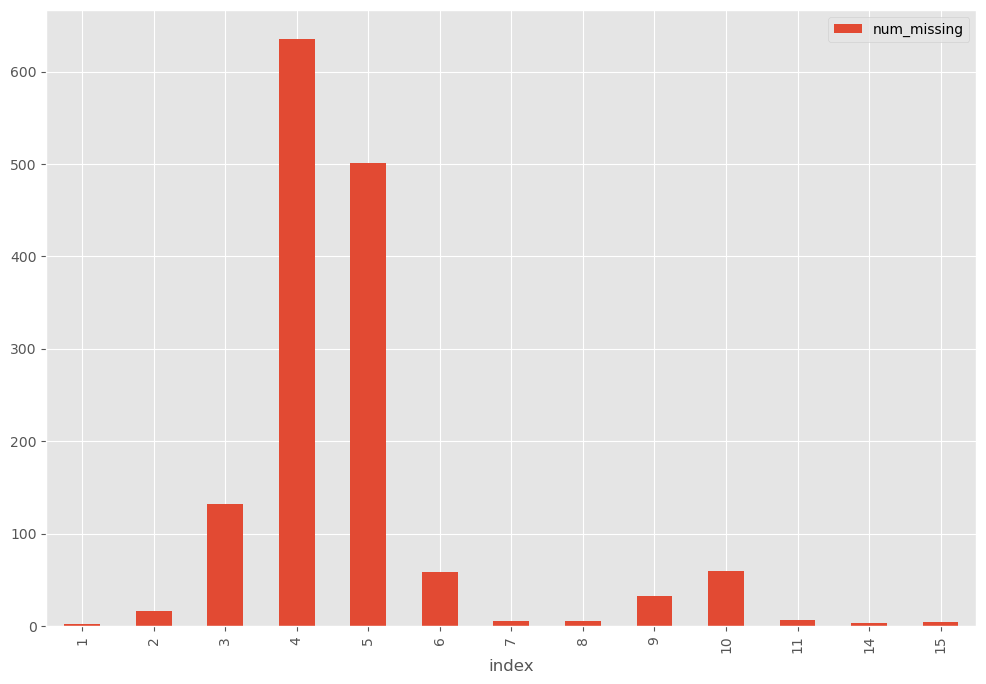

In [292]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

- From the histogram above, it is shown that there is NO observations **without** missing values
- Also, value of index **4** has the most missing values

In [293]:
# a function that calculates the percentage of missing values in numeric varibales that has missing values

df_missing_numeric = df_numeric[['LotFrontage','GarageYrBlt','MasVnrArea']].copy()
for col in df_missing_numeric.columns:
    pct_missing = np.mean(df_missing_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

LotFrontage - 18%
GarageYrBlt - 6%
MasVnrArea - 1%


<AxesSubplot:>

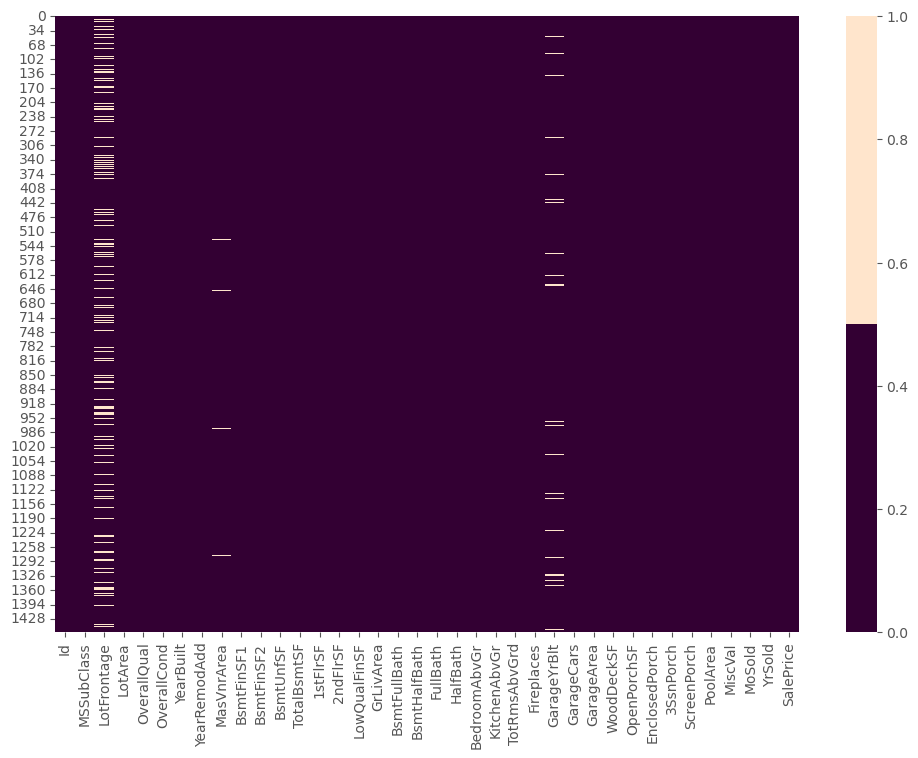

In [294]:
cols = df_numeric.columns[:39] # first 30 columns
colours = ['#330033', '#FFE5CC'] # specify the colours - beige is missing.  purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

- Change 'NA to 'none'

In [295]:
df_numeric['GarageYrBlt'] = df_numeric['GarageYrBlt'].fillna("None")

-  variables **LotFrontage** & **MasVnrArea**  have missing values

From the heatmap of numerical columns, it is noticed that, variables:

 - **LotFrontage**:' Linear feet of street connected to property' | has **18%** of missing values

 - **GarageYrBlt**: 'Year garage was built' |  has **6%** of missing values because 'GarageType was NA'

 - **MasVnrArea**: 'Masonry veneer area in square feet' | has **1%** of missing values, because of the low percentage we could consider to fill the missing values


<AxesSubplot:>

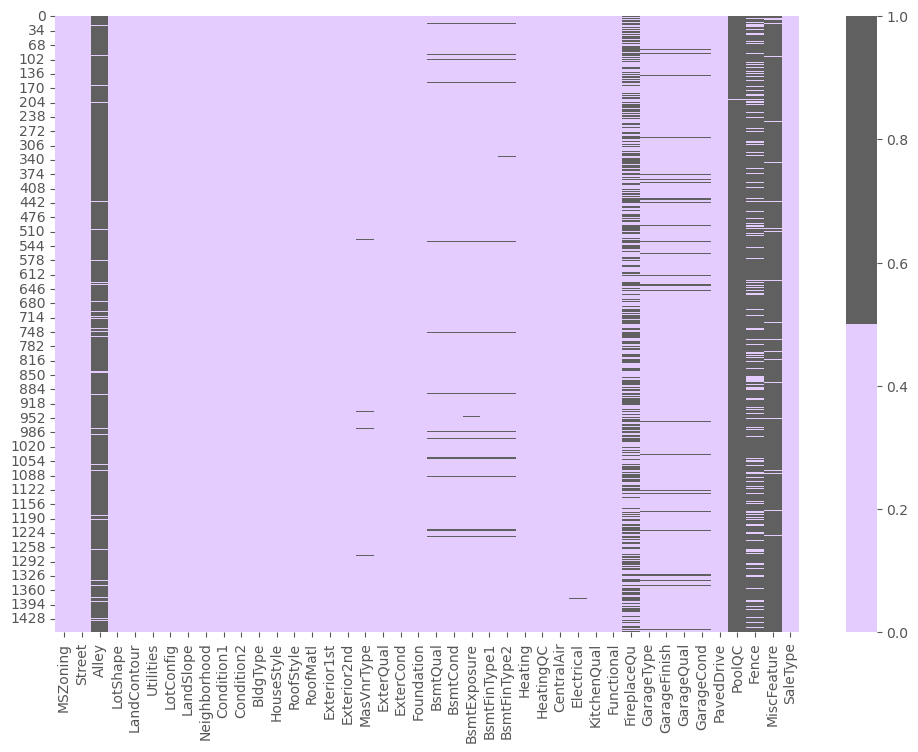

In [296]:
cols = df_non_numeric.columns[:42] # first 30 columns
colours = ['#E5CCFF', '#606060'] # specify the colours - grey is missing. purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From the heatmap of non-numerical columns, it is noticed that, variables:
- **PoolQC**: 'Pool quality' !NA is no pool!
- **MiscFeature**: 'Miscellaneous feature not covered in other categories'
- **Fence**: 'Fence quality'
- **FireplaceQu**: 'Fireplace quality'
- **Alley**: 'Type of alley access to property'  

 has the most of missing values, while,
 
 - **GarageType**: 'Masonry veneer area in square feet' 
 - **GarageFinish**:'Interior finish of the garage'
 - **GarageQual**:'Garage quality'
 - **GarageCond**'Garage condition'
 
  of some properties share the same missing values
 and, 
 - **BsmtQual**:'Baement Quality'
 - **BsmtCond**: 'Basement condition'
 - **BsmtExposure**: ' Refers to walkout or garden level walls'
 - **BsmtFinType1**:'Rating of basement finished area'
 - **BsmtFinType2**:'Rating of basement finished area (if multiple types)' 

 of some properties share the same missing values
 and,
 
 - **MasVnrType**:'Masonry veneer type' 
 has few missing values that could be filled
 

In [297]:
# a function that calculates the percentage of missing values in non numeric varibales that has missing values as shown in the heat map

df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 100%
MiscFeature - 96%
Fence - 81%
FireplaceQu - 47%
Alley - 94%
GarageType - 6%
GarageFinish - 6%
GarageQual - 6%
GarageCond - 6%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinType2 - 3%
MasVnrType - 1%


- After inspection of high percentage variables , it was found that most them gave null because in the dataset they were given a value of 'NA' which was meant to be none
and python interepts NA as Null

 for this situation, NA can be changed to another value, for example 'None'




In [298]:

df_non_numeric['PoolQC'] = df_non_numeric['PoolQC'].fillna("None")
df_non_numeric['MiscFeature'] = df_non_numeric['MiscFeature'].fillna("None")
df_non_numeric['Fence'] = df_non_numeric['Fence'].fillna("None")
df_non_numeric['FireplaceQu'] = df_non_numeric['FireplaceQu'].fillna("None")
df_non_numeric['Alley'] = df_non_numeric['Alley'].fillna("None")
df_non_numeric['GarageType'] = df_non_numeric['GarageType'].fillna("None")
df_non_numeric['GarageCond'] = df_non_numeric['GarageCond'].fillna("None")
df_non_numeric['GarageFinish'] = df_non_numeric['GarageFinish'].fillna("None")
df_non_numeric['GarageQual'] = df_non_numeric['GarageQual'].fillna("None")
df_non_numeric['BsmtQual'] = df_non_numeric['BsmtQual'].fillna("None")
df_non_numeric['BsmtCond'] = df_non_numeric['BsmtCond'].fillna("None")
df_non_numeric['BsmtExposure'] = df_non_numeric['BsmtExposure'].fillna("None")
df_non_numeric['BsmtFinType1'] = df_non_numeric['BsmtFinType1'].fillna("None")
df_non_numeric['BsmtFinType2'] = df_non_numeric['BsmtFinType2'].fillna("None")
df_non_numeric['MasVnrType'] = df_non_numeric['MasVnrType'].fillna("None")

- check for missing values precentage in **non_numeric** after changing 'NA' to 'none'

In [299]:
df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 0%
MiscFeature - 0%
Fence - 0%
FireplaceQu - 0%
Alley - 0%
GarageType - 0%
GarageFinish - 0%
GarageQual - 0%
GarageCond - 0%
BsmtQual - 0%
BsmtCond - 0%
BsmtExposure - 0%
BsmtFinType1 - 0%
BsmtFinType2 - 0%
MasVnrType - 0%


In [300]:
df_non_numeric['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [301]:
df_non_numeric['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [302]:
df_non_numeric['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

- **AllPub** All utilities
- **NoSeWa** Electricity and Gas Only

- Check for missing values after handeling them in **df_numeric** & **df_non_numeric**

created missing indicator for: LotFrontage
created missing indicator for: MasVnrArea


<AxesSubplot:xlabel='index'>

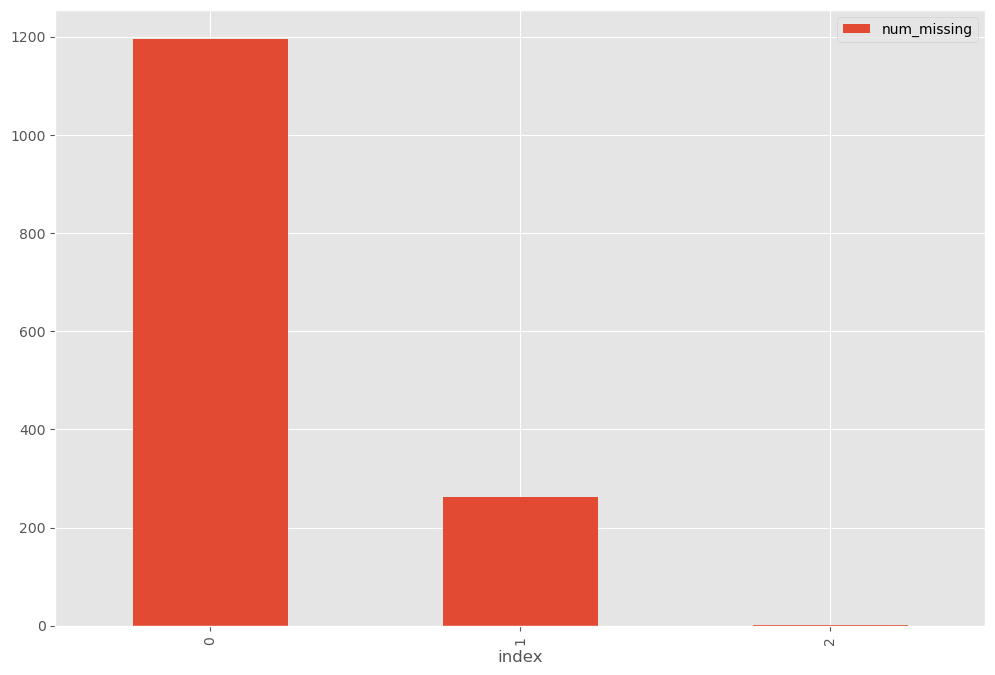

In [303]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df_numeric.columns:
    missing = df_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_numeric['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_numeric.columns if 'ismissing' in col]
df_numeric['num_missing'] = df_numeric[ismissing_cols].sum(axis=1)

df_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

created missing indicator for: Electrical


<AxesSubplot:xlabel='index'>

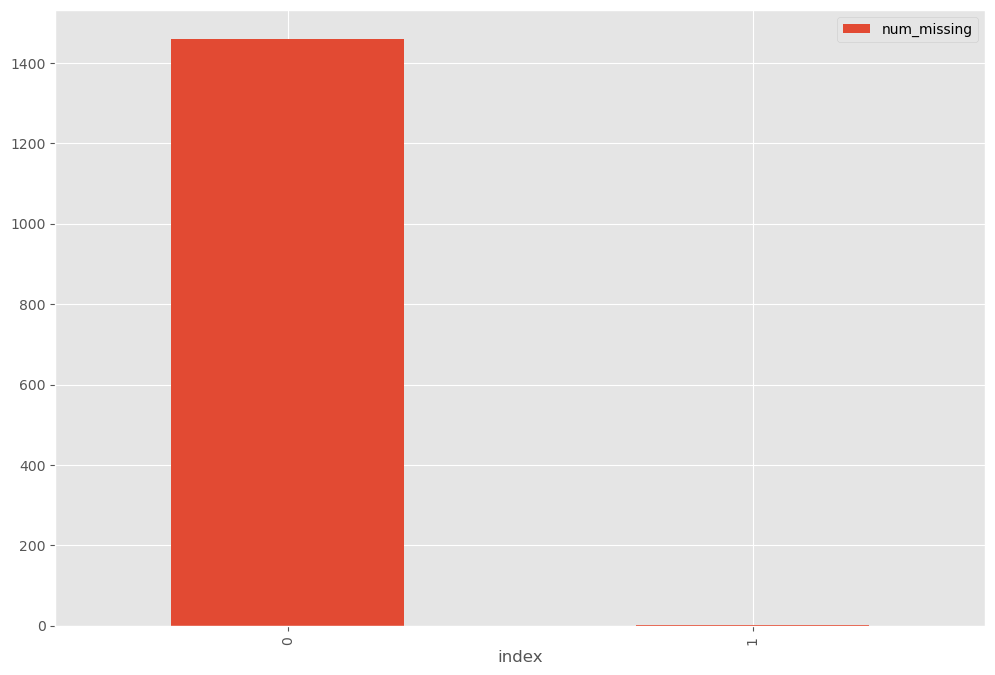

In [304]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df_non_numeric.columns:
    missing = df_non_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_non_numeric['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_non_numeric.columns if 'ismissing' in col]
df_non_numeric['num_missing'] = df_non_numeric[ismissing_cols].sum(axis=1)

df_non_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [305]:
df_numeric['num_missing'].value_counts()


0    1195
1     263
2       2
Name: num_missing, dtype: int64

In [306]:
missing_rows = df_numeric.loc[df_numeric['num_missing'] > 0]
missing_rows

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
7        8          60          NaN    10382            7            6   
12      13          20          NaN    12968            5            6   
14      15          20          NaN    10920            6            5   
16      17          20          NaN    11241            6            7   
24      25          20          NaN     8246            5            8   
...    ...         ...          ...      ...          ...          ...   
1429  1430          20          NaN    12546            6            7   
1431  1432         120          NaN     4928            6            6   
1441  1442         120          NaN     4426            6            5   
1443  1444          30          NaN     8854            6            6   
1446  1447          20          NaN    26142            5            7   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
7          1973          1973       240.0         859          32        216   
12         1962          1962         0.0         737           0        175   
14         1960          1960       212.0         733           0        520   
16         1970          1970       180.0         578           0        426   
24         1968          2001         0.0         188         668        204   
...         ...           ...         ...         ...         ...        ...   
1429       1981          1981       310.0         678           0        762   
1431       1976          1976         0.0         958           0          0   
1441       2004          2004       147.0         697           0        151   
1443       1916          1950         0.0           0           0        952   
1446       1962          1962       189.0         593           0        595   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
7            1107      1107       983             0       2090             1   
12            912       912         0             0        912             1   
14           1253      1253         0             0       1253             1   
16           1004      1004         0             0       1004             1   
24           1060      1060         0             0       1060             1   
...           ...       ...       ...           ...        ...           ...   
1429         1440      1440         0             0       1440             0   
1431          958       958         0             0        958             0   
1441          848       848         0             0        848             1   
1443          952       952         0             0        952             0   
1446         1188      1188         0             0       1188             0   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
7                0         2         1             3             1   
12               0         1         0             2             1   
14               0         1         1             2             1   
16               0         1         0             2             1   
24               0         1         0             3             1   
...            ...       ...       ...           ...           ...   
1429             0         2         0             3             1   
1431             0         2         0             2             1   
1441             0         1         0             1             1   
1443             0         1         0             2             1   
1446             0         1         0             3             1   

      TotRmsAbvGrd  Fireplaces GarageYrBlt  GarageCars  GarageArea  \
7                7           2      1973.0           2         484   
12               4           0      1962.0           1         352   
14               5           1      1960.0           1         352   
16               5           1      1970.0           2         480   
24    

- drop the rows with missing values

In [307]:
#df_numeric = df_numeric.drop(df_numeric[df_numeric['num_missing']>0].index)
df_numeric = df_numeric[df_numeric['num_missing']==0].reset_index(drop=True)


<AxesSubplot:xlabel='index'>

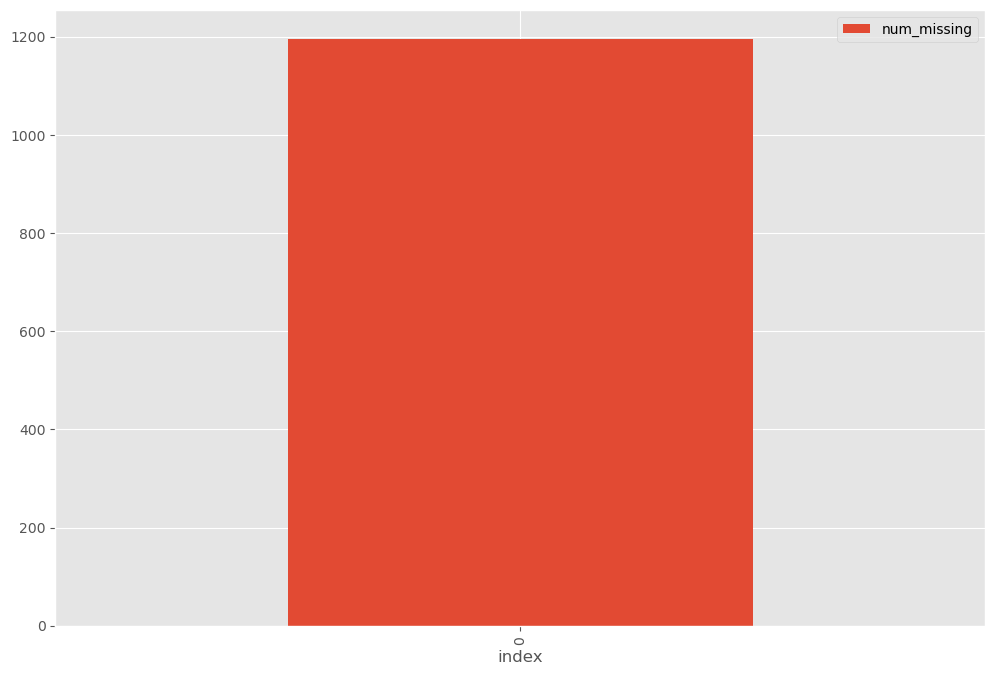

In [308]:

df_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [309]:
missing_rows['SalePrice'].mean()

183073.01509433961

- Since  'LotFrontage' is  missing in the overall data frame, it is best to drop them

In [310]:
df_non_numeric['num_missing'].value_counts()

0    1459
1       1
Name: num_missing, dtype: int64

In [311]:
missing_row = df[df_non_numeric['num_missing']> 0]
missing_row

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1379  1380          80       RL         73.0     9735   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1379         Lvl    AllPub    Inside       Gtl       Timber       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1379       Norm     1Fam       SLvl            5            5       2006   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1379          2007     Gable  CompShg     VinylSd     VinylSd       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1379         0.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1379           No          Unf           0          Unf           0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1379        384          384    GasA        Gd          Y        NaN   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1379       754       640             0       1394             0             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1379         2         1             3             1          Gd   

      TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
1379             7        Typ           0         NaN    BuiltIn       2007.0   

     GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
1379          Fin           2         400         TA         TA          Y   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1379         100            0              0          0            0   

      PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType  \
1379         0    NaN   NaN         NaN        0       5    2008       WD   

     SaleCondition  SalePrice  LotFrontage_ismissing  Alley_ismissing  \
1379        Normal     167500                  False             True   

      MasVnrType_ismissing  MasVnrArea_ismissing  BsmtQual_ismissing  \
1379                 False                 False               False   

      BsmtCond_ismissing  BsmtExposure_ismissing  BsmtFinType1_ismissing  \
1379               False                   False                   False   

      BsmtFinType2_ismissing  Electrical_ismissing  FireplaceQu_ismissing  \
1379                   False                  True                   True   

      GarageType_ismissing  GarageYrBlt_ismissing  GarageFinish_ismissing  \
1379                 False                  False                   False   

      GarageQual_ismissing  GarageCond_ismissing  PoolQC_ismissing  \
1379                 False                 False              True   

      Fence_ismissing  MiscFeature_ismissing  num_missing  
1379             True                   True            6

In [312]:
#df_non_numeric = df_non_numeric.drop(df_non_numeric[df_non_numeric['num_missing']>0].index)
df_non_numeric = df_non_numeric[df_non_numeric['num_missing']==0].reset_index(drop=True)


<AxesSubplot:xlabel='index'>

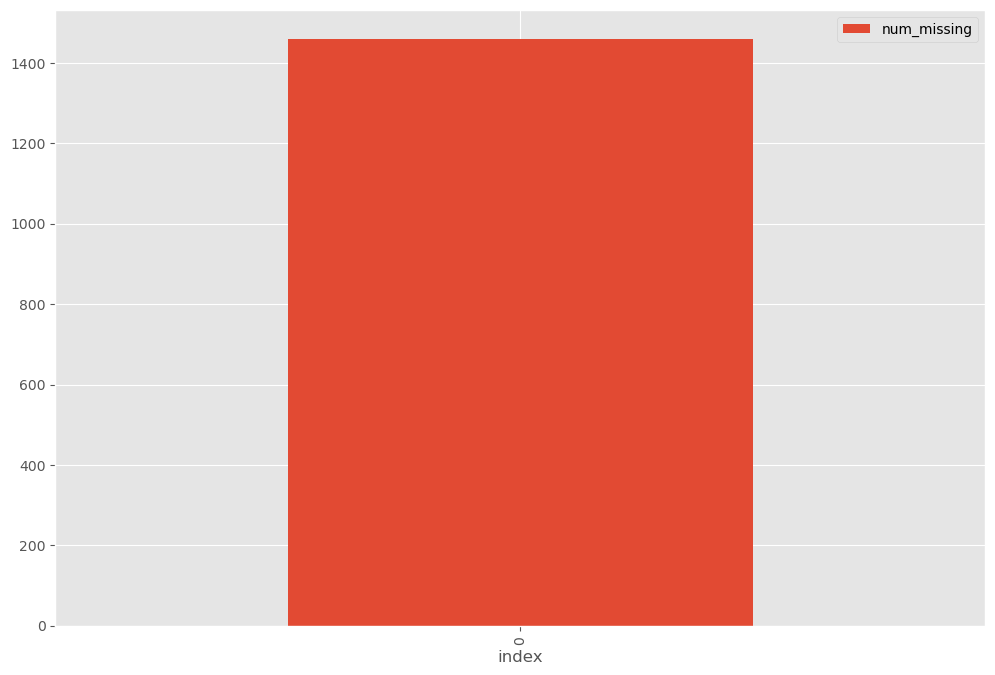

In [313]:
df_non_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [314]:
# df_handeled_missing  merge or not?

2- Check for **Outliers**
- Numerical

[Text(0, 0, 'MSSubClass'),
 Text(1, 0, 'LotFrontage'),
 Text(2, 0, 'LotArea'),
 Text(3, 0, 'OverallQual'),
 Text(4, 0, 'OverallCond'),
 Text(5, 0, 'YearBuilt'),
 Text(6, 0, 'YearRemodAdd'),
 Text(7, 0, 'MasVnrArea'),
 Text(8, 0, 'TotalBsmtSF'),
 Text(9, 0, '1stFlrSF'),
 Text(10, 0, '2ndFlrSF'),
 Text(11, 0, 'LowQualFinSF'),
 Text(12, 0, 'GrLivArea'),
 Text(13, 0, 'BsmtFullBath'),
 Text(14, 0, 'BsmtHalfBath'),
 Text(15, 0, 'FullBath'),
 Text(16, 0, 'HalfBath'),
 Text(17, 0, 'BedroomAbvGr'),
 Text(18, 0, 'KitchenAbvGr'),
 Text(19, 0, 'TotRmsAbvGrd'),
 Text(20, 0, 'Fireplaces'),
 Text(21, 0, 'GarageCars'),
 Text(22, 0, 'GarageArea'),
 Text(23, 0, 'WoodDeckSF'),
 Text(24, 0, 'OpenPorchSF'),
 Text(25, 0, 'EnclosedPorch'),
 Text(26, 0, '3SsnPorch'),
 Text(27, 0, 'ScreenPorch'),
 Text(28, 0, 'PoolArea'),
 Text(29, 0, 'MiscVal'),
 Text(30, 0, 'YrSold'),
 Text(31, 0, 'SalePrice')]

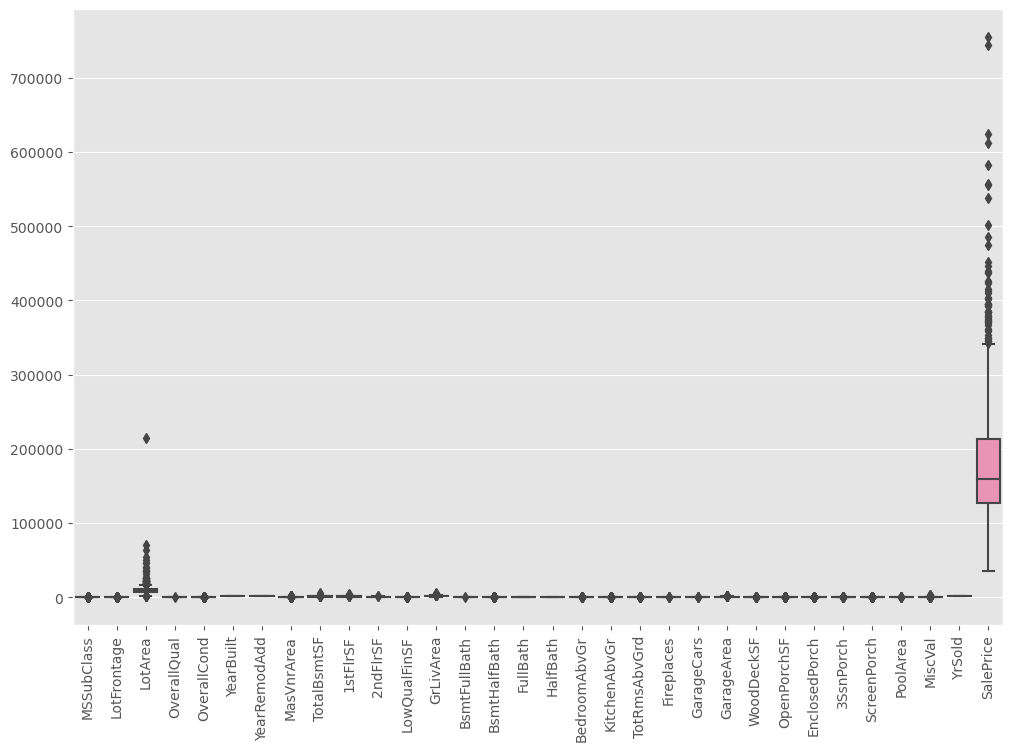

In [315]:
ax = sns.boxplot(data=df_numeric[[ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual' ,'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
'TotalBsmtSF', '1stFlrSF' ,'2ndFlrSF', 'LowQualFinSF',
 'GrLivArea' ,'BsmtFullBath', 'BsmtHalfBath' ,'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd' ,'Fireplaces', 'GarageYrBlt',
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','YrSold',
 'SalePrice' ]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

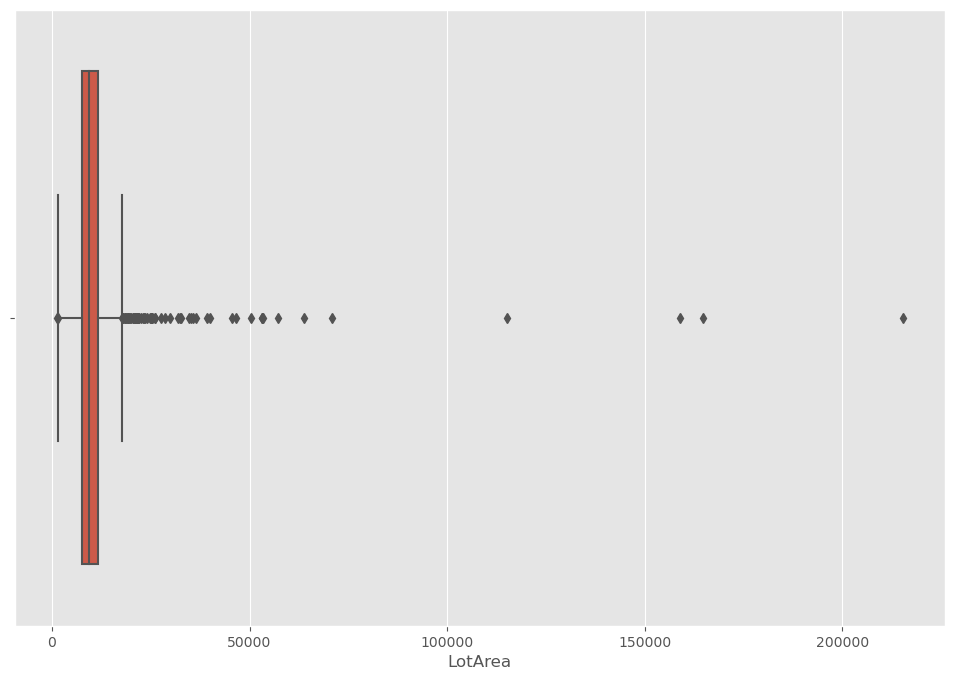

In [316]:
sns.boxplot(df['LotArea'])

In [317]:

# Position of the Outlier
print(np.where(df_numeric['LotArea']>50000))

(array([  44,  260,  373,  639, 1063], dtype=int64),)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual'>

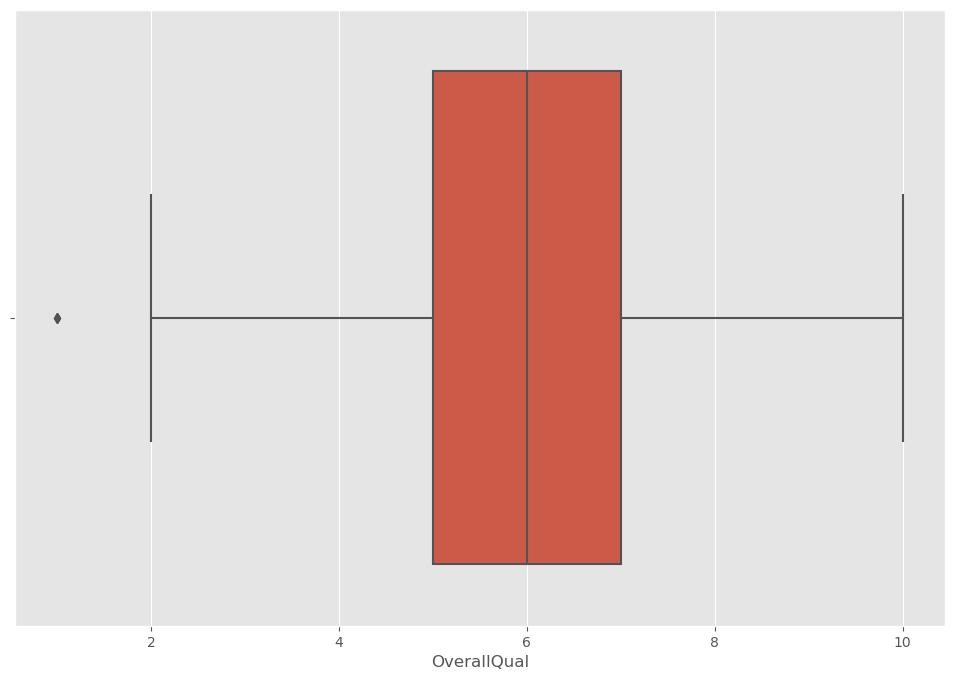

In [318]:
sns.boxplot(df['OverallQual'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallCond'>

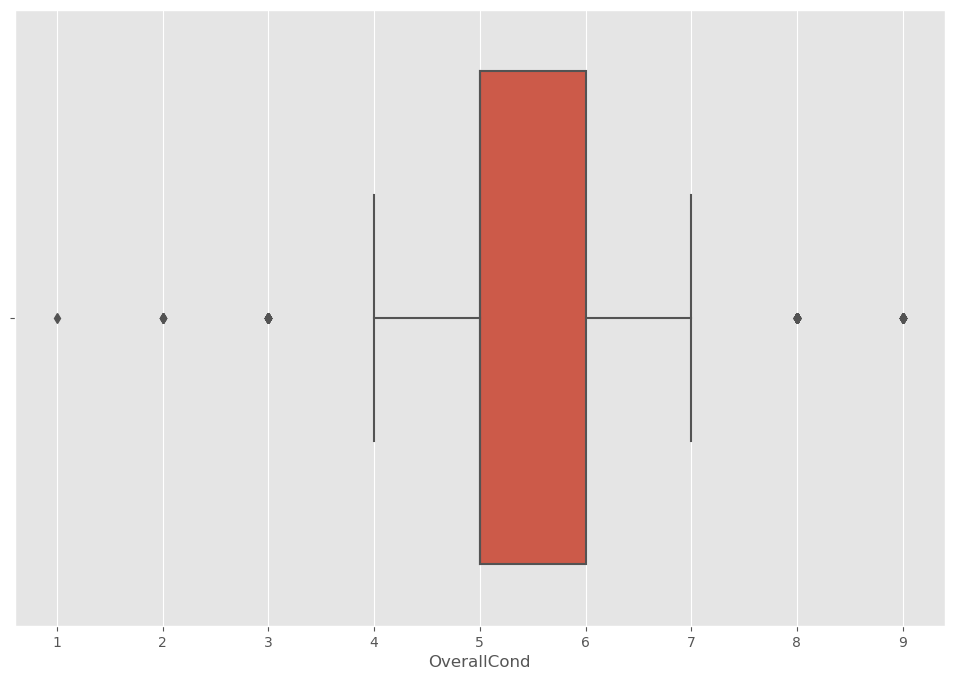

In [319]:
sns.boxplot(df['OverallCond'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

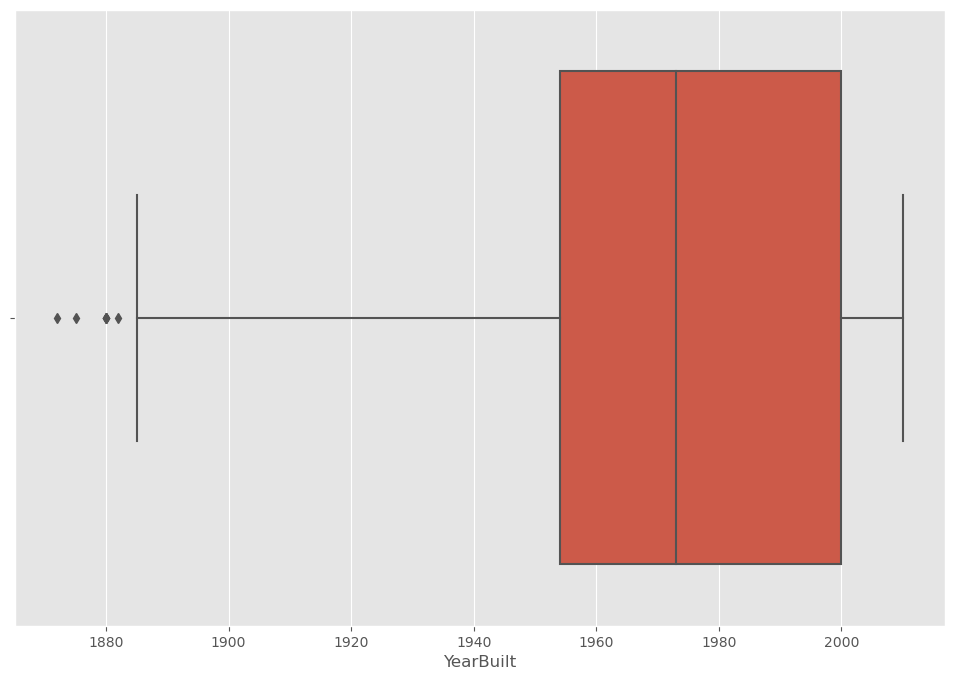

In [320]:
sns.boxplot(df['YearBuilt'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea'>

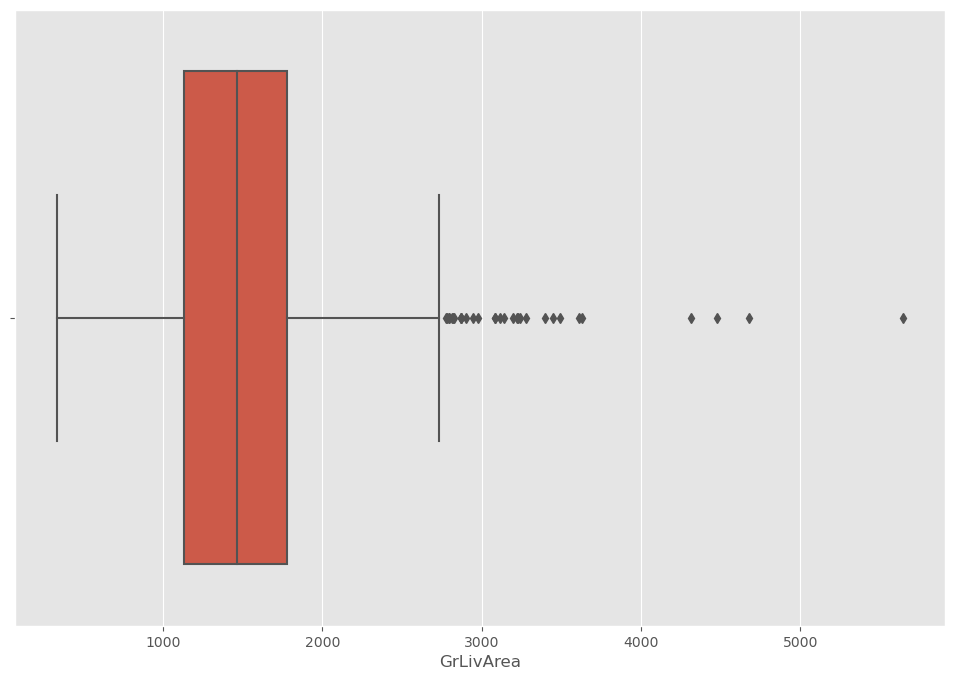

In [321]:
sns.boxplot(df['GrLivArea'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

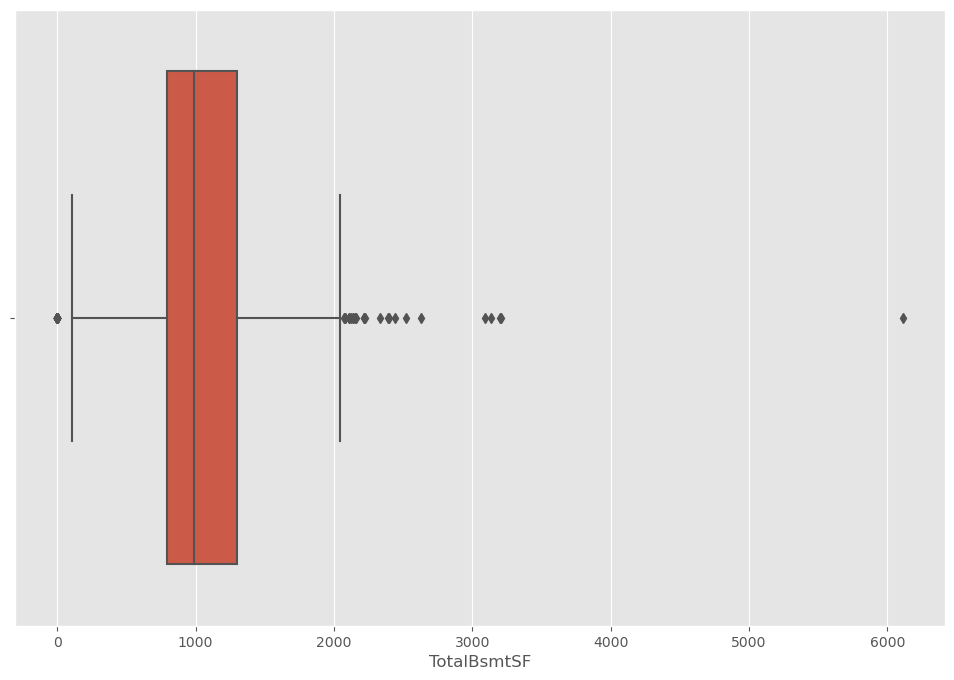

In [322]:
sns.boxplot(df['TotalBsmtSF'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

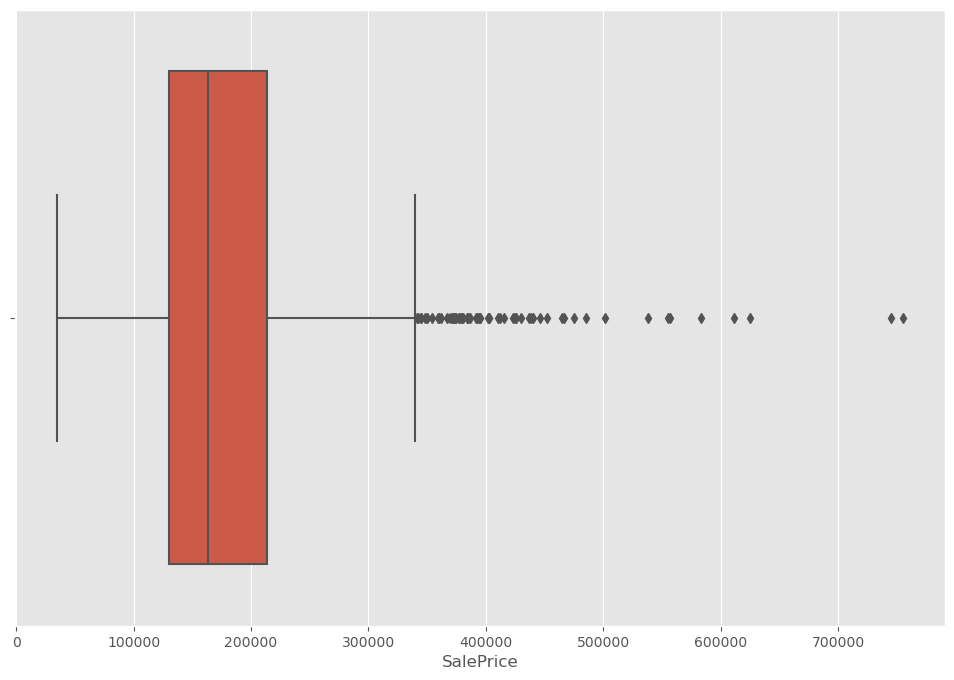

In [323]:
sns.boxplot(df['SalePrice'])

- Data in the boxplots that are outside the skewers are acting as outliers


In [324]:

''' Detection '''
# IQR
Q1 = np.percentile(df_numeric['SalePrice'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_numeric['SalePrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_numeric.shape)
 
# Upper bound
upper = np.where(df_numeric['SalePrice'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_numeric['SalePrice'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_numeric.drop(upper[0], inplace = True)
df_numeric.drop(lower[0], inplace = True)
 
print("New Shape: ", df_numeric.shape)

Old Shape:  (1195, 41)
New Shape:  (1139, 41)


In [325]:
df_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0      2003.0           2         548           0           61              0   
1      1976.0           2         460         298            0              0   
2      2001.0           2         608           0           42              0   
3      1998.0           3         642           0           35            272   
4      2000.0           3         836         192           84              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  \
0          0            0         0        0       2    2008     208500   
1          0            0         0        0       5    2007     181500   
2          0            0         0        0       9    2008     223500   
3          0            0         0        0       2    2006     140000   
4          0            0         0        0      12    2008     250000   

   LotFrontage_ismissing  MasVnrArea_ismissing  num_missing  
0                  False                 False            0  
1                  False                 False            0  
2                  False                 False            0  
3                  False                 False            0  
4                  False                 False            0

In [326]:
df_numeric.describe()


Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1139.000000  1139.000000  1139.000000   1139.000000  1139.000000   
mean    730.343284    57.875329    69.089552   9490.604917     5.984197   
std     422.998474    43.728455    23.833651   4800.417619     1.307581   
min       1.000000    20.000000    21.000000   1300.000000     1.000000   
25%     368.500000    20.000000    59.000000   7235.500000     5.000000   
50%     732.000000    50.000000    68.000000   9100.000000     6.000000   
75%    1096.500000    70.000000    80.000000  10924.000000     7.000000   
max    1460.000000   190.000000   313.000000  70761.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1139.000000  1139.000000   1139.000000  1139.000000  1139.000000   
mean      5.583845  1968.968393   1984.166813    87.527656   395.235294   
std       1.105484    31.534828     21.232173   161.727678   431.115167   
min       2.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1949.000000   1965.000000     0.000000     0.000000   
50%       5.000000  1970.000000   1993.000000     0.000000   336.000000   
75%       6.000000  2000.000000   2004.000000   130.000000   659.500000   
max       9.000000  2009.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2   BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1139.000000  1139.00000  1139.000000  1139.000000  1139.000000   
mean     43.964004   582.32748  1021.526778  1124.844601   334.136084   
std     155.912230   436.22806   418.231728   358.270719   417.782059   
min       0.000000     0.00000     0.000000   334.000000     0.000000   
25%       0.000000   244.00000   777.000000   864.000000     0.000000   
50%       0.000000   506.00000   967.000000  1063.000000     0.000000   
75%       0.000000   832.50000  1249.500000  1337.000000   714.500000   
max    1474.000000  2042.00000  6110.000000  4692.000000  1818.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1139.000000  1139.000000   1139.000000   1139.000000  1139.000000   
mean       6.479368  1465.460053      0.391572      0.055312     1.539069   
std       49.979348   482.328322      0.512891      0.236248     0.537693   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1121.000000      0.000000      0.000000     1.000000   
50%        0.000000  1428.000000      0.000000      0.000000     2.000000   
75%        0.000000  1718.000000      1.000000      0.000000     2.000000   
max      515.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1139.000000   1139.000000   1139.000000   1139.000000  1139.000000   
mean      0.353819      2.861282      1.054434      6.425812     0.538191   
std       0.496394      0.797669      0.238303      1.541597     0.611179   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     0.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1139.000000  1139.000000  1139.000000  1139.000000     1139.00000   
mean      1.705882   455.964881    84.425812    43.690957       23.75856   
std       0.751373   211.549183   115.814152    65.286049       62.86772   
min       0.000000     0.000000     0.000000     0.000000        0.00000   
25%       1.000000   308.000000     0.000000     0.000000        0.00000   
50%       2.000000   470.000000     0.000000    20.000000        0.00000   
75%       2.000000   576.000000   159.500000    63.000000        0.00000   
max       

- From the data frame above, we can detect outliers comparing the mean with its max value,
for example,
 - pool area mean = 2 while max = 783


- from describe, 4 group plots were created depending on the variables scale

In [327]:
df_G1 = df_numeric[[ 'LotFrontage', 'LowQualFinSF' , 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch','PoolArea' ]].copy()
df_G2 = df_numeric[['BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','MasVnrArea']].copy()
df_G3 = df_numeric[['LotArea','MiscVal']].copy()


<AxesSubplot:>

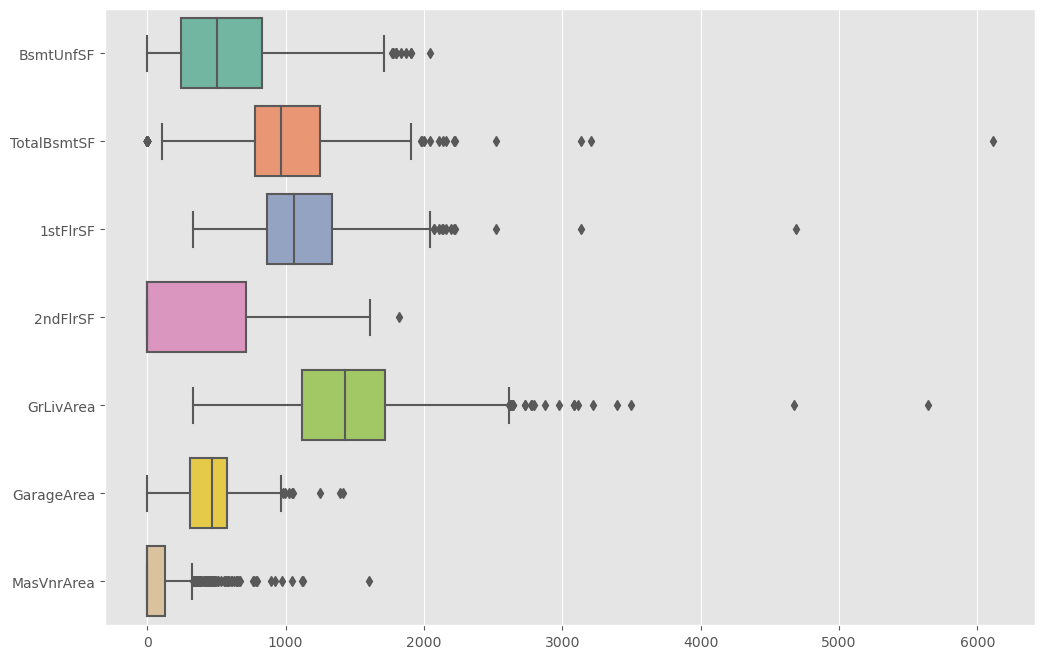

In [328]:
sns.boxplot(data=df_G2, orient="h", palette="Set2")

Tukey’s box plot method

Next to its visual benefits, the box plot provides useful statistics to identify individual observations as outliers. Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.

-  identify the actual indexes of the outlying observations

In [329]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        


Text(0.5, 0, 'Above grade (ground) living area square feet')

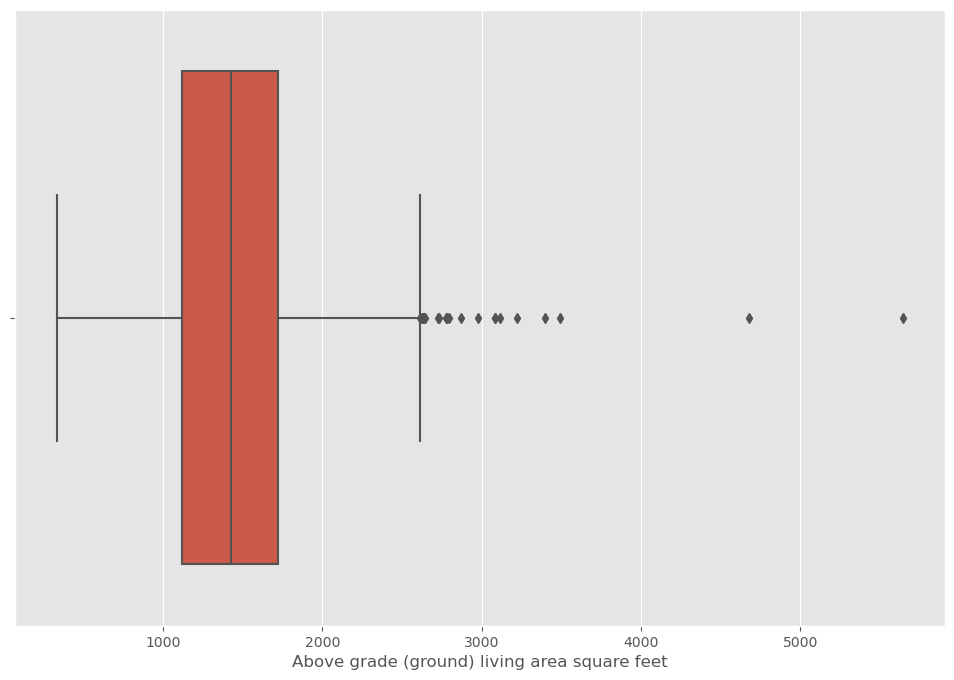

In [330]:
ax = sns.boxplot(x=df_numeric["GrLivArea"])
ax.set_xlabel('Above grade (ground) living area square feet')

In [331]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "GrLivArea")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [523, 691, 1182, 1298]
Possible outliers [58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]


Text(0.5, 0, 'Total square feet of basement area')

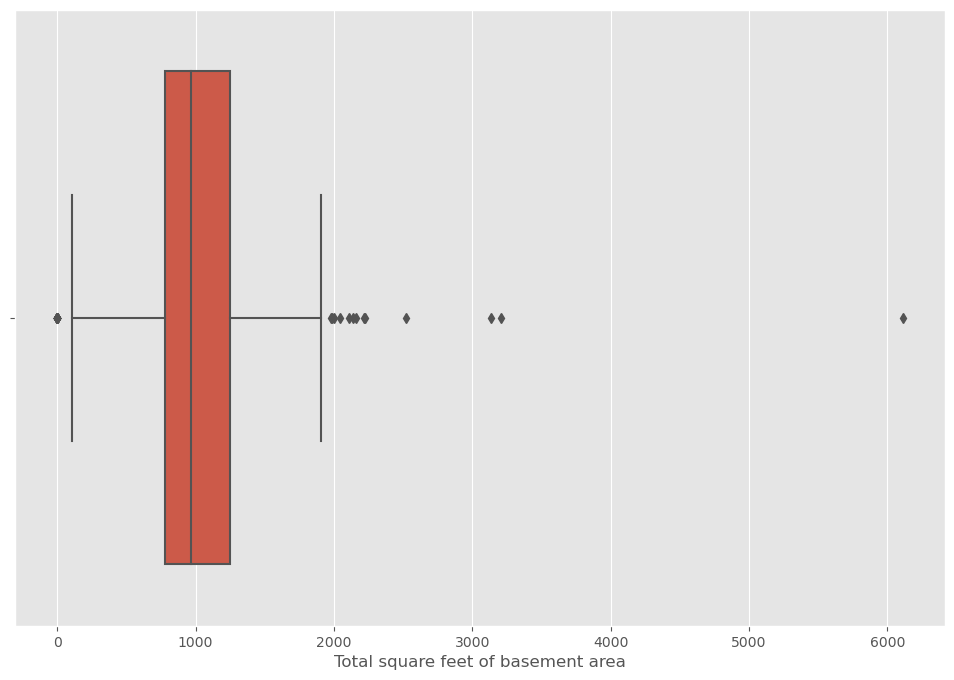

In [332]:
ax = sns.boxplot(x=df_numeric["TotalBsmtSF"])
ax.set_xlabel('Total square feet of basement area')

In [333]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "TotalBsmtSF")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [332, 440, 496, 523, 1298]
Possible outliers [17, 39, 70, 90, 102, 156, 178, 182, 224, 259, 278, 313, 332, 342, 362, 371, 392, 440, 477, 496, 520, 523, 532, 533, 553, 646, 654, 664, 691, 705, 736, 749, 778, 825, 868, 888, 894, 897, 898, 984, 1000, 1011, 1035, 1044, 1045, 1048, 1049, 1090, 1179, 1182, 1205, 1216, 1218, 1223, 1232, 1243, 1250, 1298, 1321, 1373, 1412]


Text(0.5, 0, 'First Floor square feet')

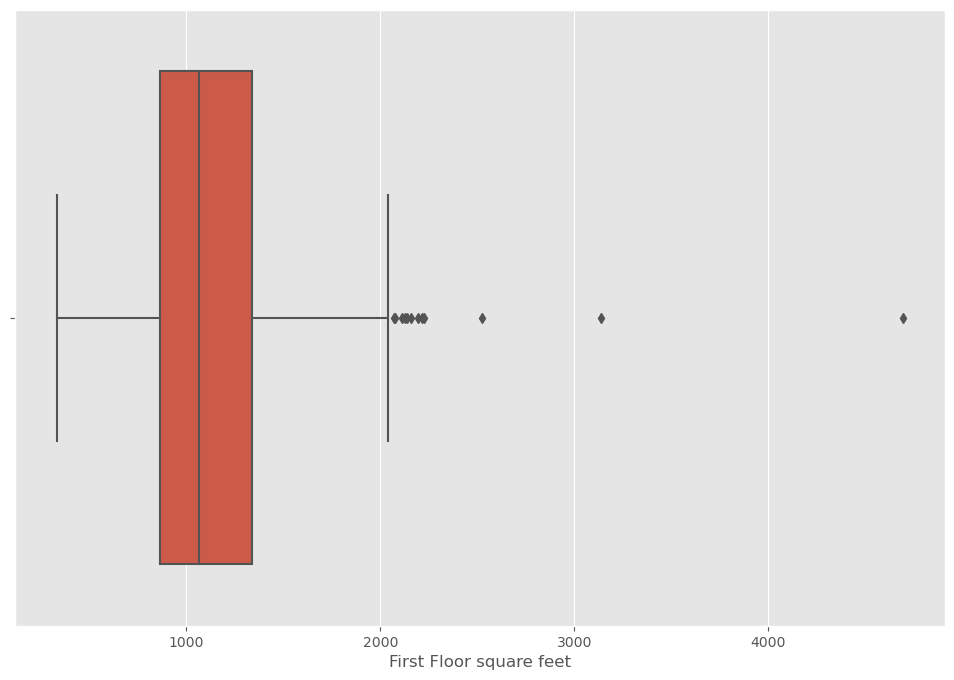

In [334]:
ax = sns.boxplot(x=df_numeric["1stFlrSF"])
ax.set_xlabel('First Floor square feet')

In [335]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "1stFlrSF")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [496, 523, 1298]
Possible outliers [66, 70, 113, 175, 178, 224, 440, 496, 523, 529, 691, 888, 898, 1024, 1044, 1182, 1205, 1298, 1346, 1373]


In [336]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "BsmtUnfSF")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers []
Possible outliers [22, 78, 137, 169, 224, 238, 278, 350, 477, 496, 552, 581, 618, 678, 768, 774, 798, 803, 843, 928, 932, 963, 1008, 1046, 1166, 1241, 1267, 1318, 1324]


In [337]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "2ndFlrSF")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers []
Possible outliers [691, 1182]


In [338]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "GarageArea")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [581, 1190, 1298]
Possible outliers [178, 224, 270, 317, 408, 581, 664, 718, 803, 825, 1061, 1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417]


In [339]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "MasVnrArea")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [58, 70, 105, 115, 161, 178, 224, 297, 349, 477, 517, 523, 691, 755, 763, 798, 808, 825, 898, 981, 1169, 1228, 1289, 1298, 1373, 1417]
Possible outliers [25, 37, 56, 58, 64, 70, 80, 81, 82, 104, 105, 109, 115, 151, 159, 161, 169, 173, 178, 180, 224, 231, 235, 249, 251, 297, 343, 349, 359, 362, 363, 403, 412, 423, 477, 479, 481, 517, 523, 524, 539, 540, 591, 598, 618, 623, 640, 654, 661, 678, 691, 700, 702, 718, 731, 755, 759, 763, 769, 798, 803, 808, 815, 825, 895, 898, 944, 955, 961, 981, 987, 990, 997, 1059, 1083, 1111, 1169, 1191, 1193, 1209, 1228, 1256, 1268, 1275, 1286, 1287, 1289, 1298, 1324, 1336, 1353, 1373, 1417, 1420, 1426, 1437, 1447]


------------------

<AxesSubplot:>

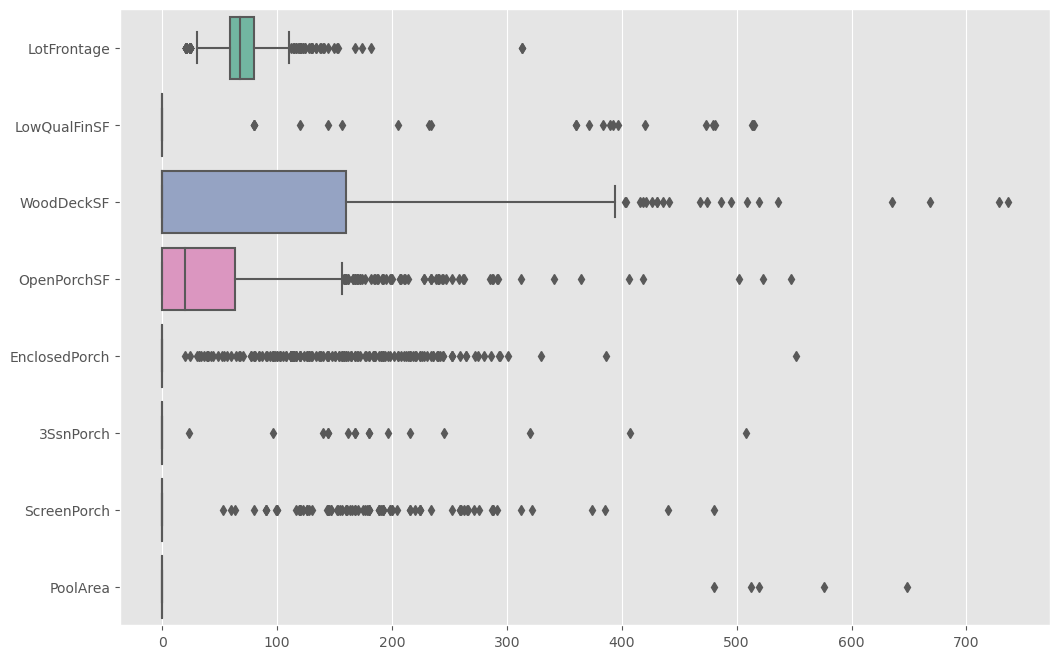

In [340]:
sns.boxplot(data=df_G1, orient="h", palette="Set2")

In [341]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "LotFrontage")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [197, 231, 313, 807, 909, 934, 1107, 1127, 1182, 1211, 1298, 1337]
Possible outliers [36, 41, 56, 75, 85, 86, 145, 150, 159, 171, 193, 195, 197, 225, 227, 231, 232, 235, 260, 276, 277, 290, 302, 306, 313, 363, 429, 430, 432, 434, 446, 489, 500, 504, 523, 599, 614, 649, 655, 662, 675, 758, 807, 825, 829, 837, 889, 906, 909, 915, 934, 956, 959, 962, 963, 966, 991, 1007, 1010, 1029, 1038, 1039, 1061, 1088, 1091, 1104, 1106, 1107, 1127, 1151, 1160, 1168, 1169, 1173, 1182, 1191, 1211, 1219, 1273, 1291, 1298, 1334, 1337, 1339, 1359, 1361, 1378, 1449]


In [342]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "WoodDeckSF")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [53, 1068, 1459]
Possible outliers [53, 64, 166, 169, 172, 302, 335, 343, 357, 480, 538, 661, 674, 769, 828, 848, 893, 951, 961, 974, 1044, 1068, 1076, 1130, 1141, 1190, 1210, 1312, 1313, 1423, 1440, 1459]


In [343]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "OpenPorchSF")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [495, 499, 523, 583, 591, 645, 713, 735, 784, 807, 854, 875, 961, 996, 1193, 1292, 1298, 1328]
Possible outliers [7, 14, 28, 81, 87, 112, 126, 176, 183, 185, 198, 217, 222, 238, 291, 293, 309, 316, 377, 384, 391, 414, 449, 495, 499, 523, 549, 583, 591, 603, 621, 641, 645, 664, 666, 713, 735, 745, 765, 775, 784, 803, 807, 854, 860, 875, 883, 888, 914, 918, 932, 947, 953, 961, 988, 996, 1106, 1109, 1123, 1164, 1184, 1193, 1203, 1227, 1234, 1243, 1278, 1287, 1292, 1298, 1310, 1317, 1328, 1336, 1354, 1369, 1372, 1374, 1423]


<AxesSubplot:>

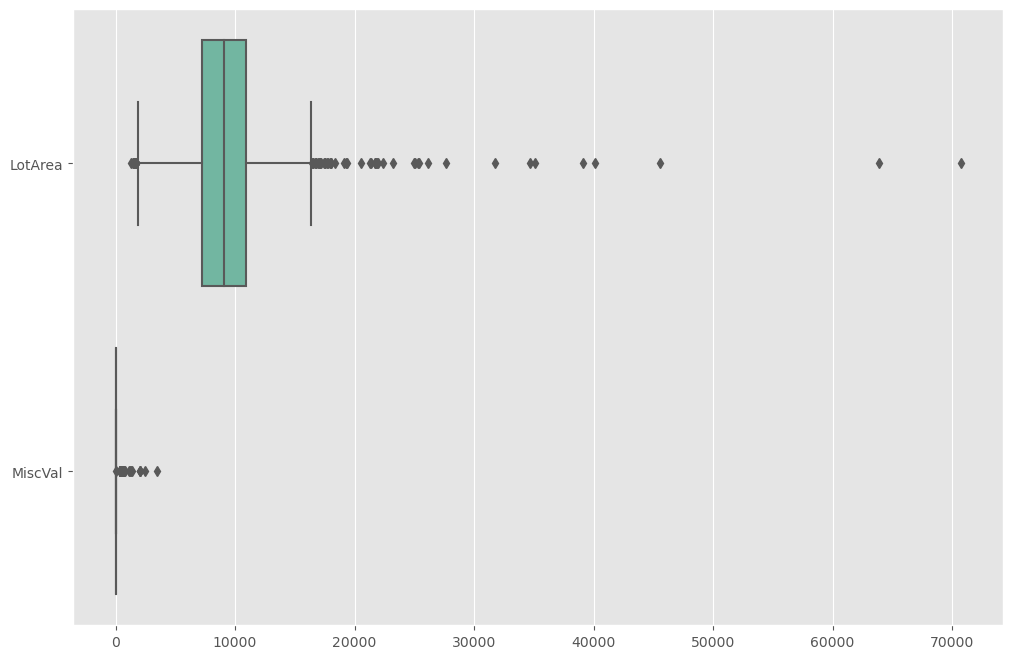

In [344]:
sns.boxplot(data=df_G3, orient="h", palette="Set2")

In [345]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "MiscVal")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 2

In [346]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "LotArea")

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [53, 171, 197, 249, 271, 313, 335, 384, 411, 451, 457, 523, 529, 588, 661, 692, 706, 769, 828, 848, 876, 934, 939, 943, 1057, 1169, 1184, 1190, 1260, 1287, 1298, 1383, 1396, 1446]
Possible outliers [53, 66, 113, 120, 159, 171, 185, 197, 249, 260, 271, 277, 304, 313, 335, 349, 364, 384, 411, 417, 422, 451, 457, 523, 529, 558, 563, 588, 661, 664, 666, 691, 692, 706, 726, 769, 807, 828, 848, 854, 876, 934, 939, 943, 956, 1010, 1039, 1048, 1057, 1061, 1107, 1151, 1169, 1173, 1184, 1190, 1230, 1260, 1270, 1277, 1287, 1298, 1346, 1383, 1396, 1409, 1423, 1430, 1446]


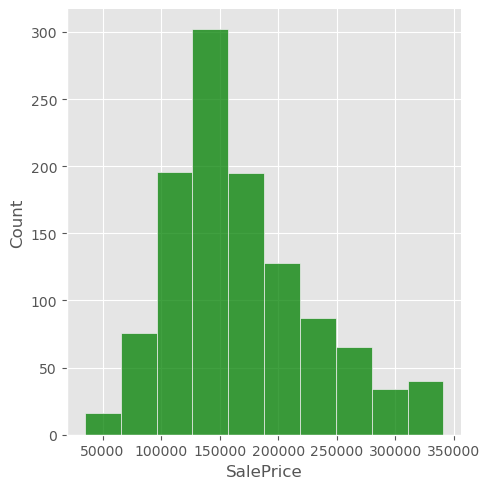

In [347]:
sns.displot(df_numeric['SalePrice'], color='g', bins=10)


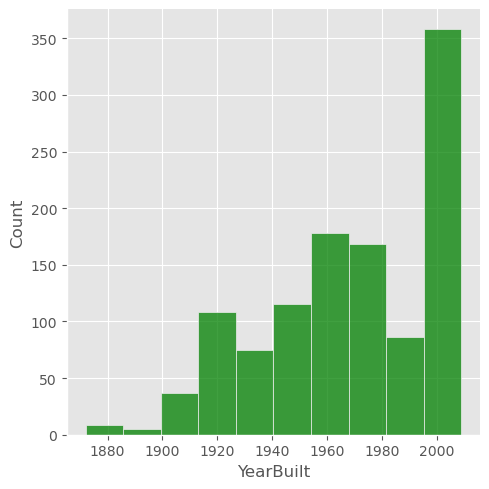

In [348]:
sns.displot(df_numeric['YearBuilt'], color='g', bins=10)

Text(0.5, 1.0, 'Sale Price vs. overall condition of the house')

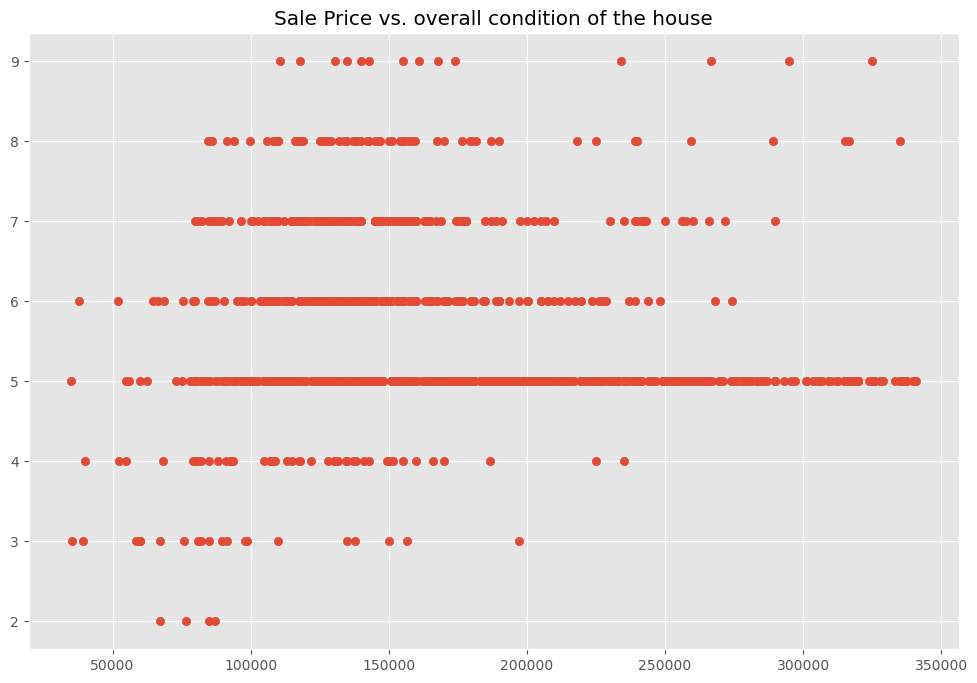

In [349]:
plt.scatter(df_numeric['SalePrice'],df_numeric['OverallCond'])
plt.title('Sale Price vs. overall condition of the house')

Text(0.5, 1.0, 'Sale Price vs. overall material and finish of the house')

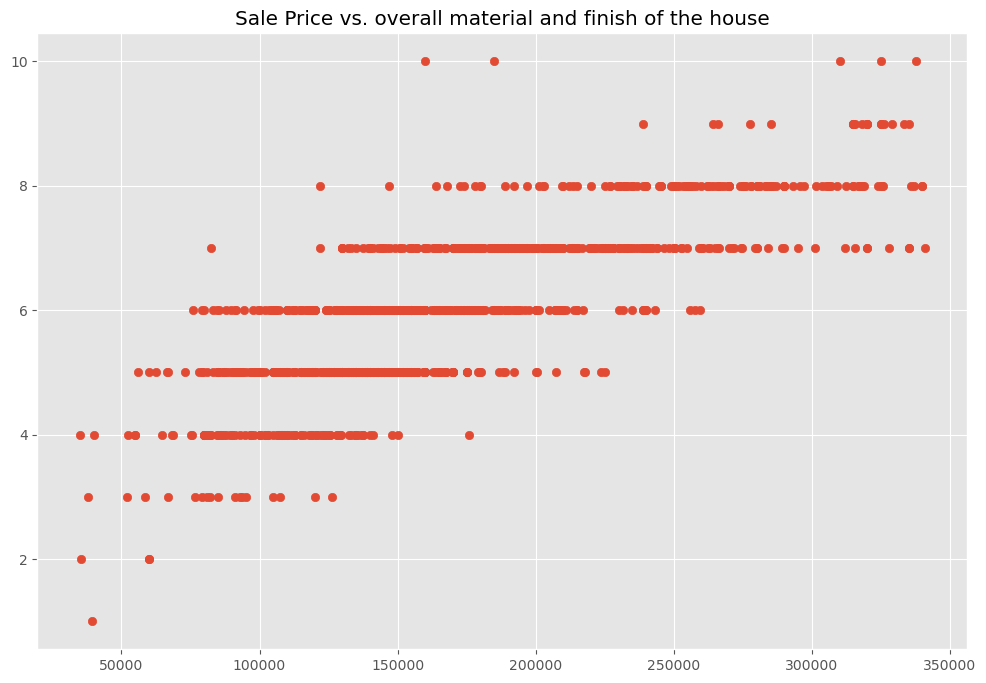

In [350]:
plt.scatter(df_numeric['SalePrice'],df_numeric['OverallQual'])
plt.title('Sale Price vs. overall material and finish of the house')

Text(0.5, 1.0, 'Sale Price vs. Pool Area - 0=No Pool')

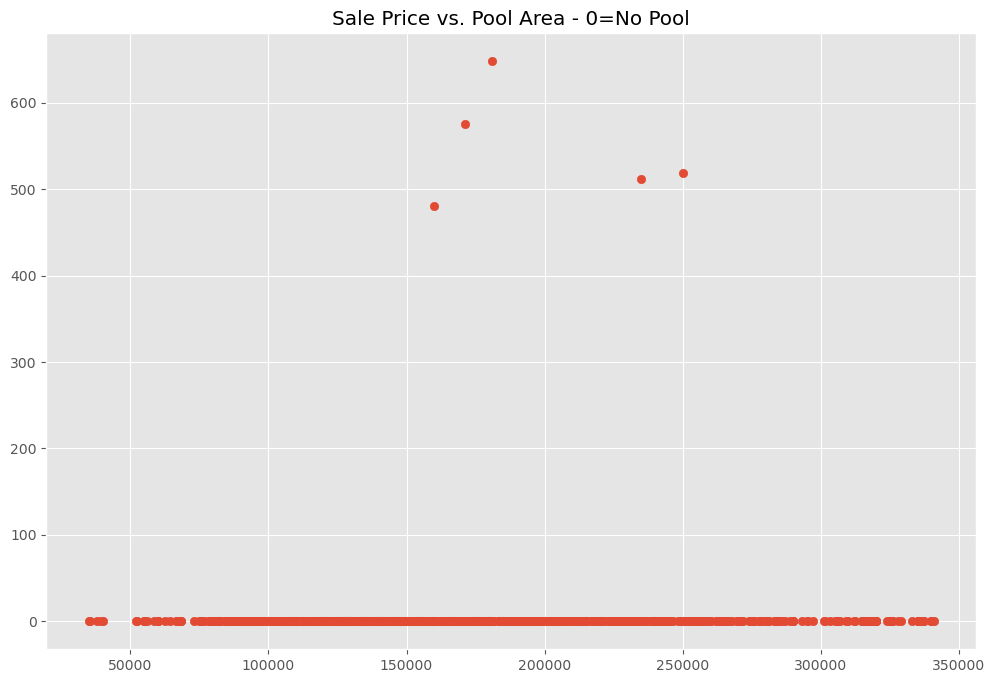

In [351]:
plt.scatter(df_numeric['SalePrice'],df_numeric['PoolArea'])
plt.title('Sale Price vs. Pool Area - 0=No Pool')

since most observations has no pool, and the remainig acts as ouliers, it is best to drop the feature

Text(0.5, 1.0, 'Sale Price vs. Total square feet of basement area')

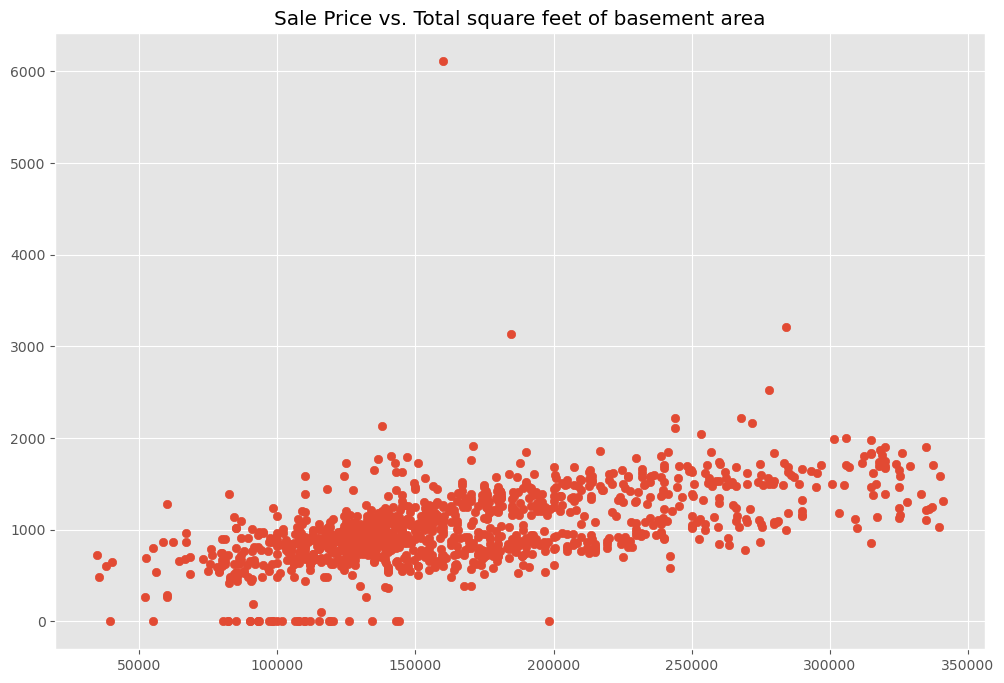

In [352]:
plt.scatter(df_numeric['SalePrice'],df_numeric['TotalBsmtSF'])
plt.title('Sale Price vs. Total square feet of basement area')

Text(0.5, 1.0, 'Sale Price vs. Lot size in square feet')

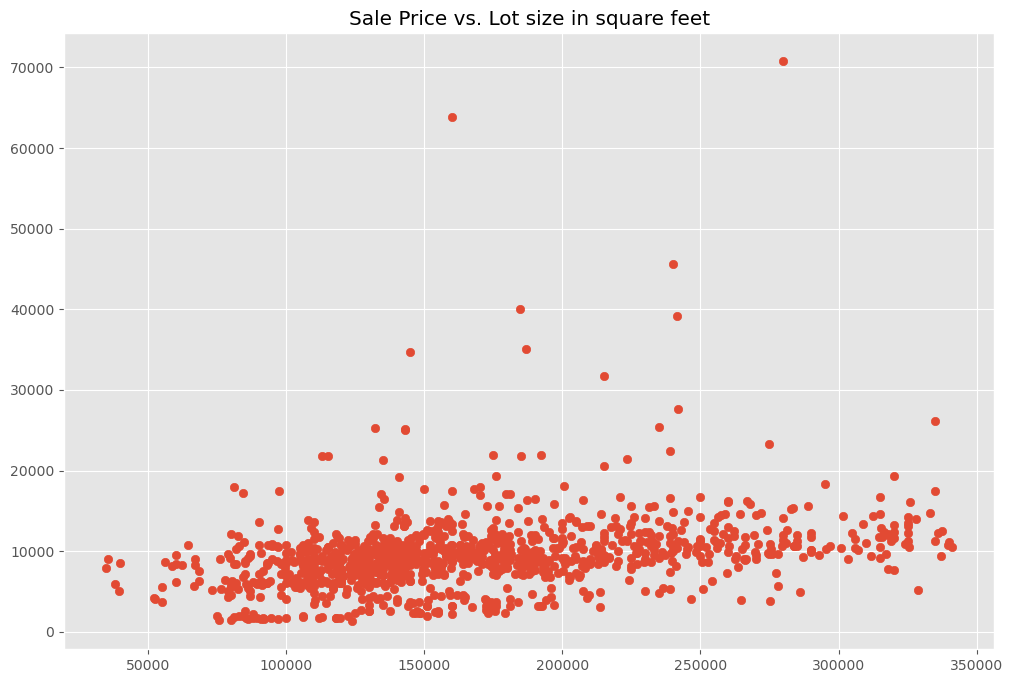

In [353]:
plt.scatter(df_numeric['SalePrice'],df_numeric['LotArea'])
plt.title('Sale Price vs. Lot size in square feet')

Text(0.5, 1.0, 'Sale Price vs. First Floor square feet')

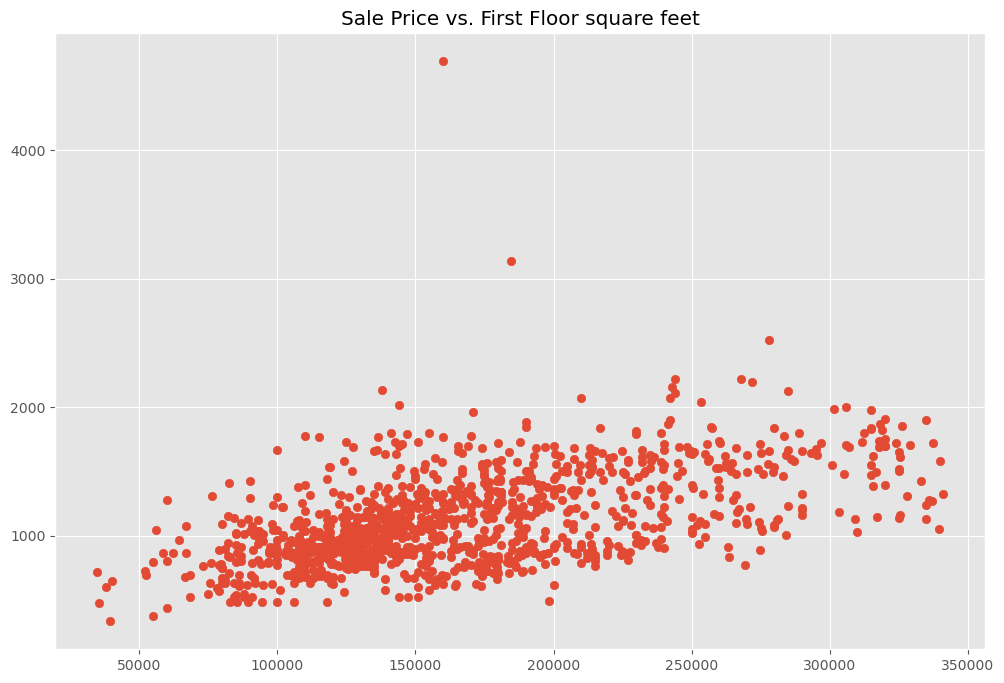

In [354]:
plt.scatter(df_numeric['SalePrice'],df_numeric['1stFlrSF'])
plt.title('Sale Price vs. First Floor square feet')

Text(0.5, 1.0, 'Sale Price vs. Second Floor square feet')

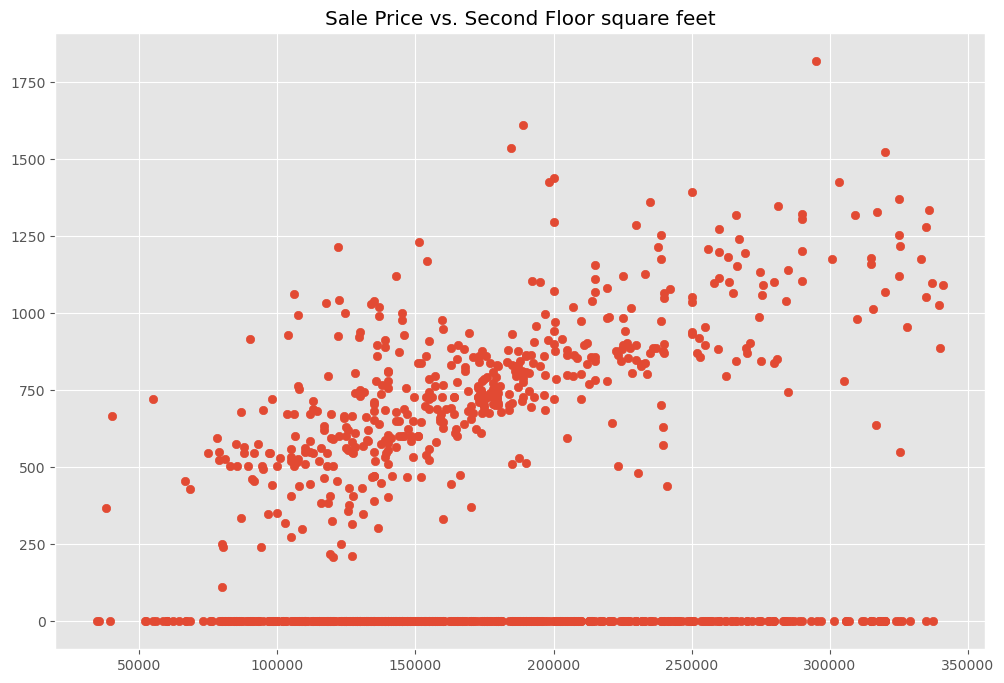

In [355]:
plt.scatter(df_numeric['SalePrice'],df_numeric['2ndFlrSF'])
plt.title('Sale Price vs. Second Floor square feet')

Text(0.5, 1.0, 'Sale Price vs. Total rooms above grade (does not include bathrooms)')

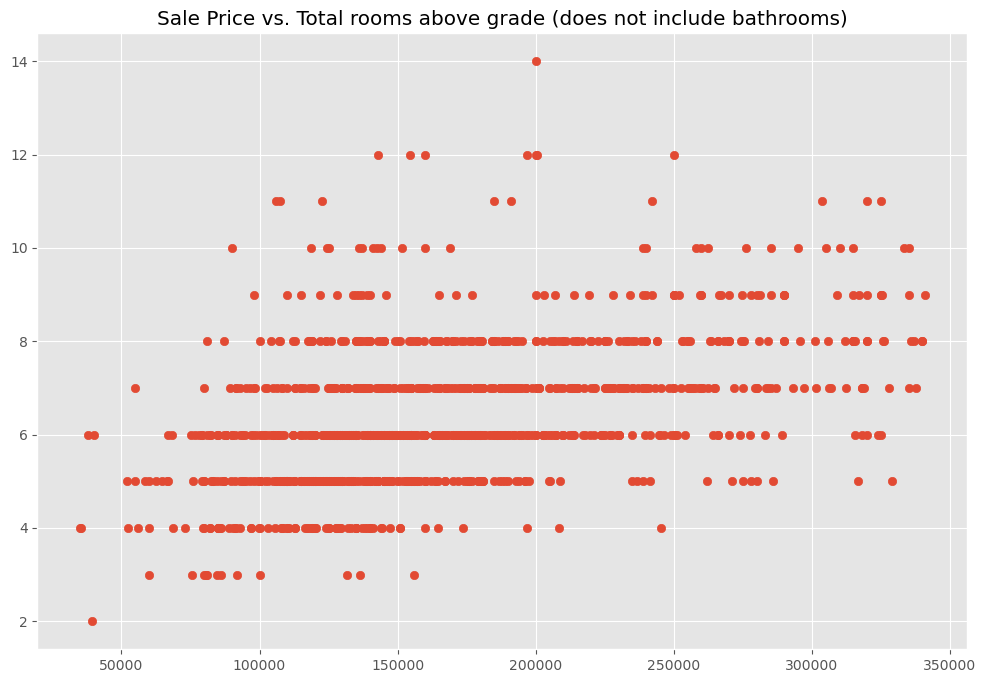

In [356]:
plt.scatter(df_numeric['SalePrice'],df_numeric['TotRmsAbvGrd'])
plt.title('Sale Price vs. Total rooms above grade (does not include bathrooms)')

Text(0.5, 1.0, 'Sale Price vs. Size of garage in car capacity')

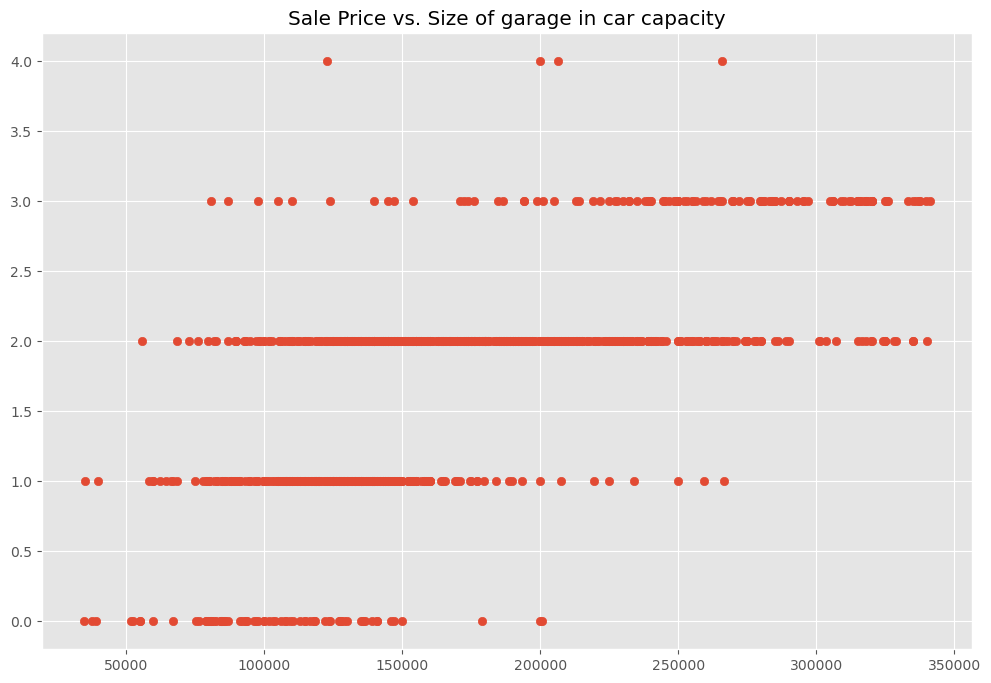

In [357]:
plt.scatter(df_numeric['SalePrice'],df_numeric['GarageCars'])
plt.title('Sale Price vs. Size of garage in car capacity')

Text(0.5, 1.0, 'Sale Price vs. Wood deck area in square feet')

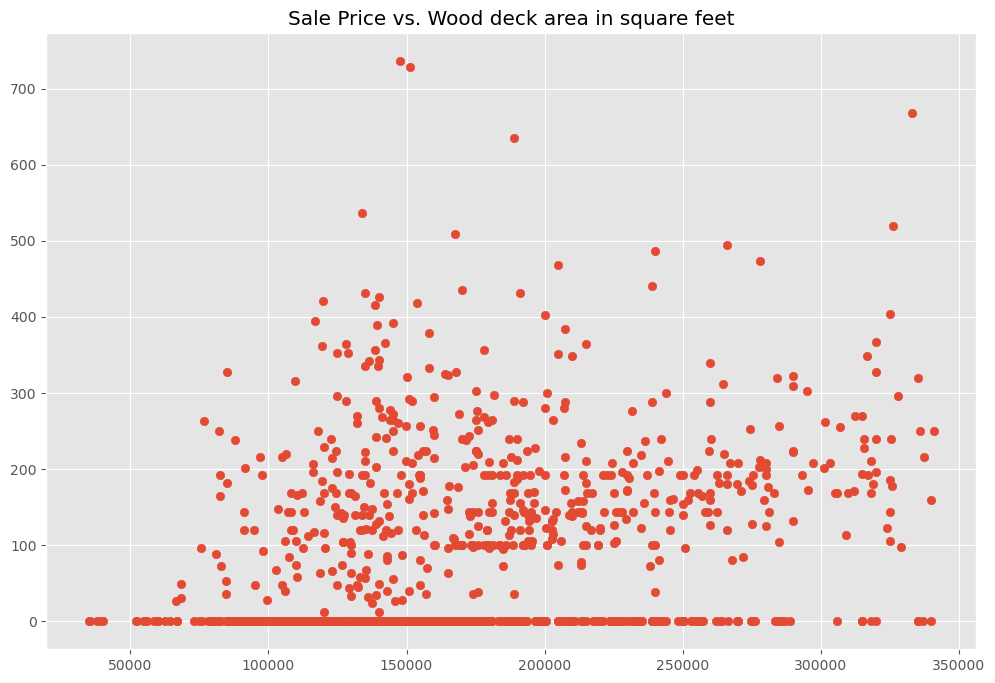

In [358]:
plt.scatter(df_numeric['SalePrice'],df_numeric['WoodDeckSF'])
plt.title('Sale Price vs. Wood deck area in square feet')

Text(0.5, 1.0, 'Sale Price vs. Open porch area in square feet')

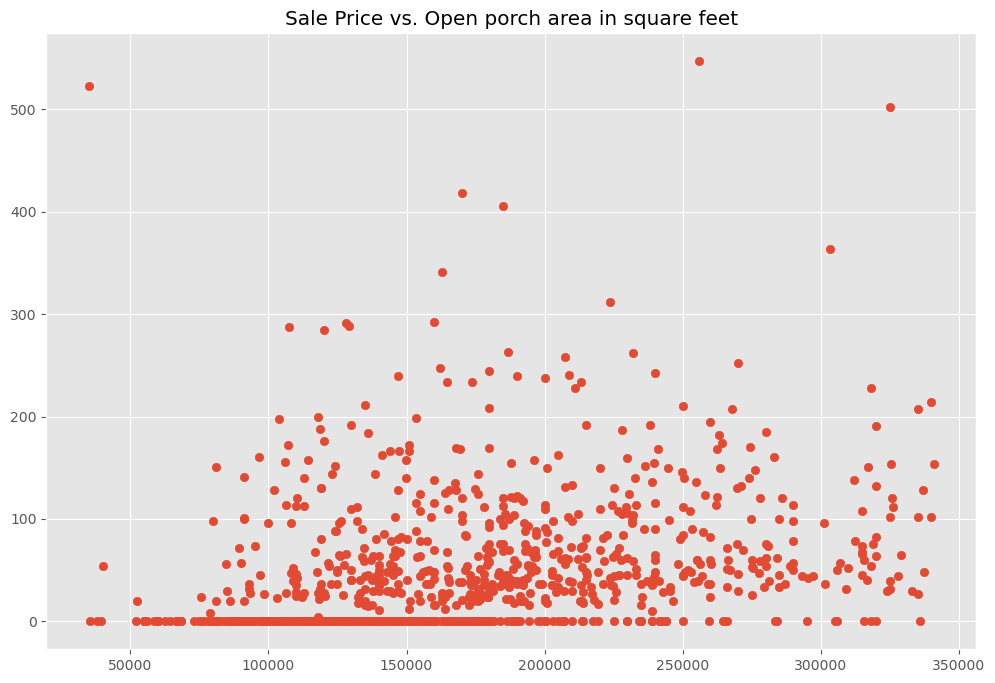

In [359]:
plt.scatter(df_numeric['SalePrice'],df_numeric['OpenPorchSF'])
plt.title('Sale Price vs. Open porch area in square feet')

Feature Selection
based on the EDA (Exploratory Data Analysis) above, the following numerical features are selected

- correlation of sale price with selected numerical features

In [360]:
df_numerical_features = df_numeric[[ 'LotArea', 'OverallQual' ,'OverallCond',
 'YearBuilt',  
'TotalBsmtSF', '1stFlrSF' ,'2ndFlrSF',
 'GrLivArea' ,'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',  
 'SalePrice' ]].copy()
 

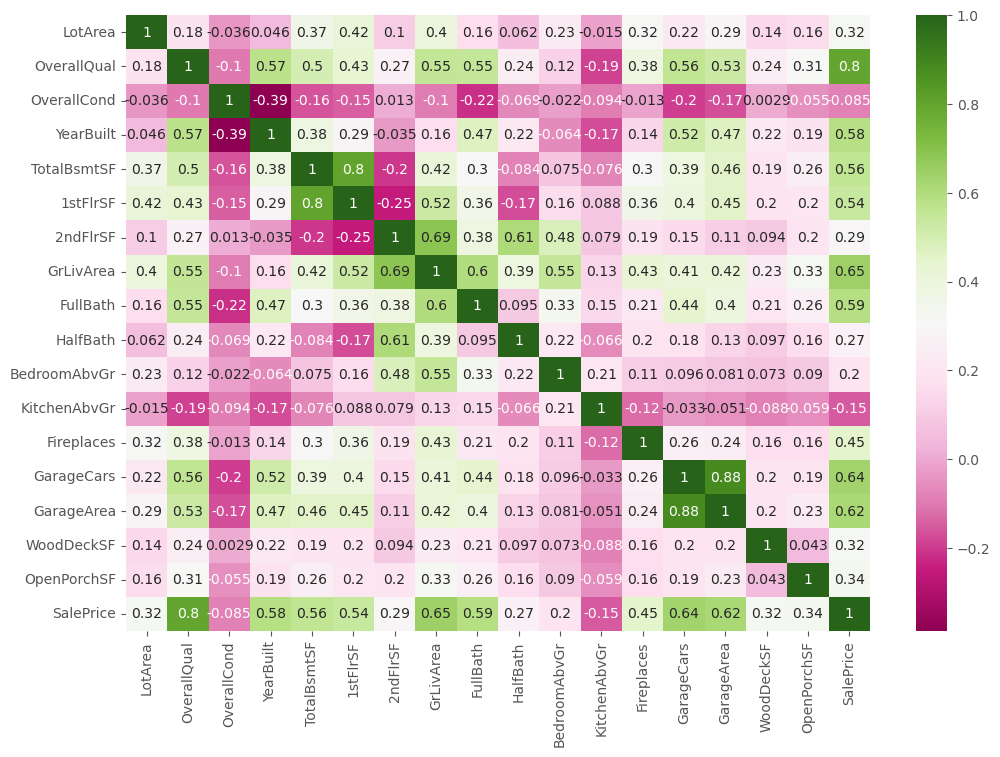

In [361]:
dataplot = sns.heatmap(df_numerical_features.corr(), cmap="PiYG", annot=True)

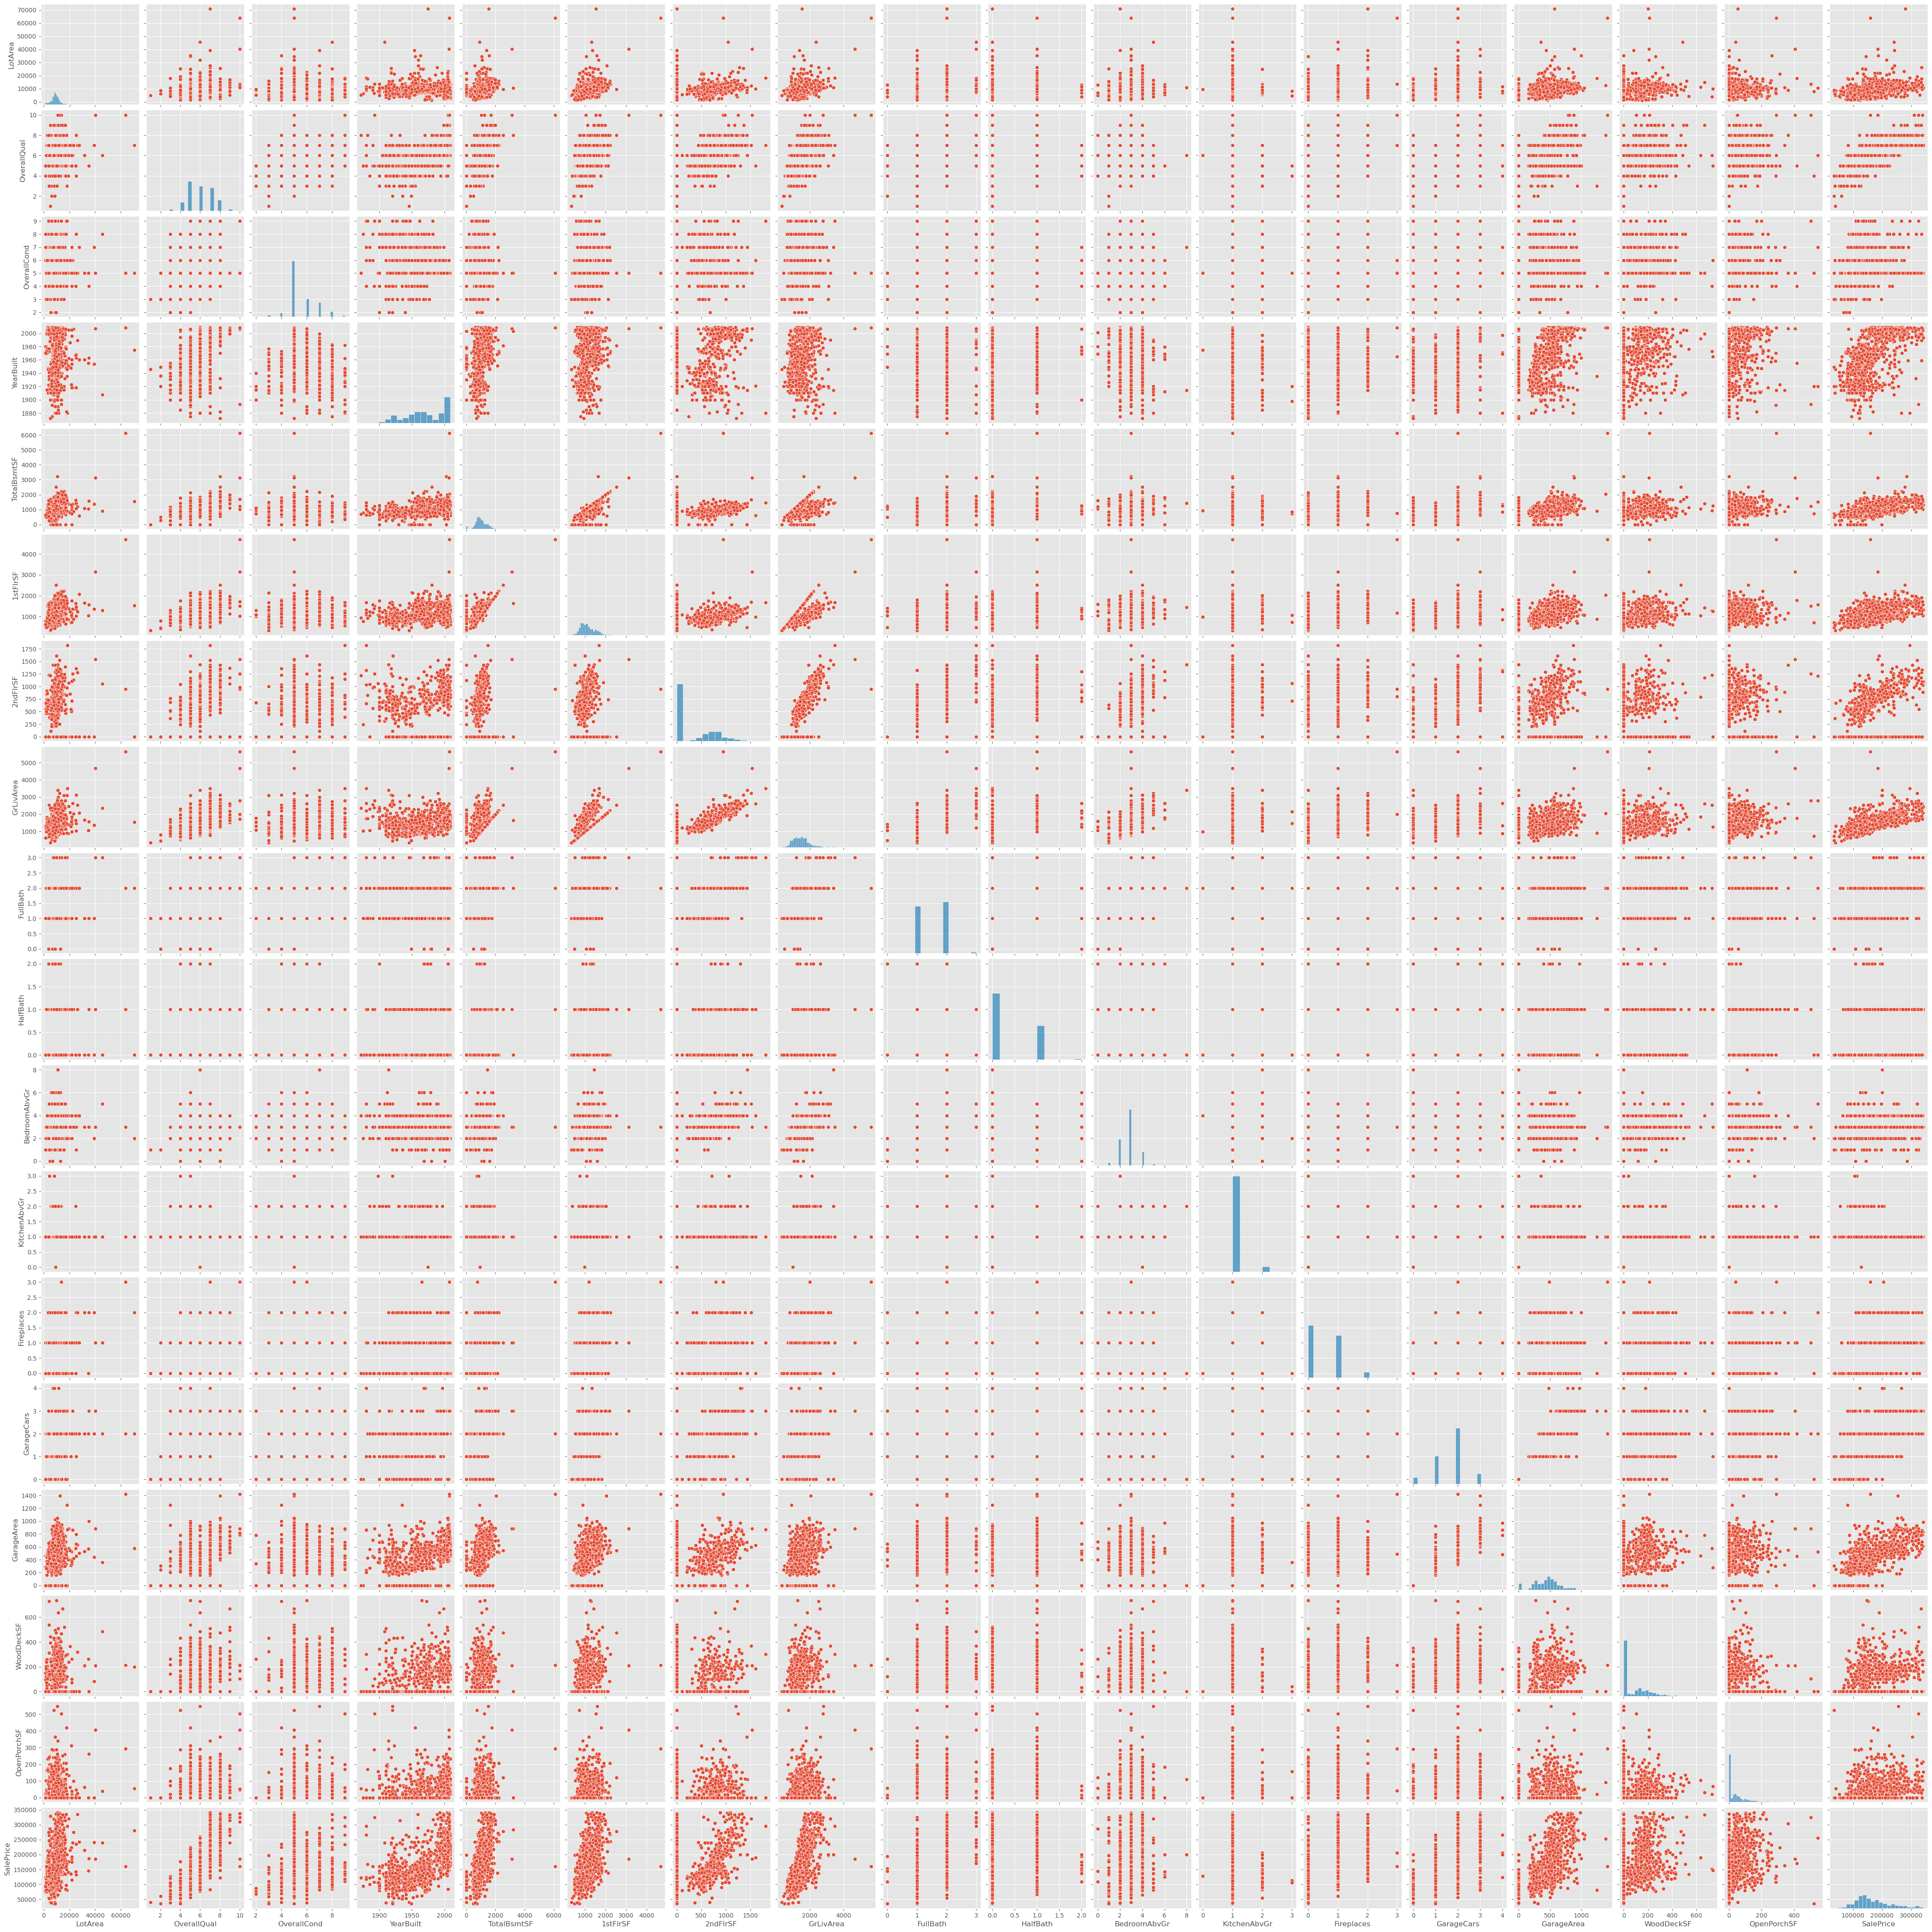

In [362]:
sns.pairplot(df_numerical_features)

- Non-numerical

Detecting outliers in the categorical data is something about the comparison between the percentage of availability of data for all the categories. 

In [363]:
df_non_numeric.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Electrical_ismissing', 'num_missing'],
      dtype='object')